#### Setup:  All necessary packages are imported.  Variables, parameters, and files used later in the code are defined.

Import packages, specify figures and plotting preferences

In [31]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import pims
import trackpy as tp
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import sys

In [32]:
%matplotlib inline
mpl.rc('figure', figsize = (40,28))
mpl.rc('image', cmap = 'gray')

Assign variables that will be used as arguments in functions later on in the code

In [2]:
sphereSize = 19
sphereMass = 3000
pixelsMoved = 40
frameNumber = 1
trackingStartFrame = 0
trackingEndFrame = -1
stubsFitltering = 500
memoryTime = 250
framerate = 40
radius = 223

Assign variables to files used in the code

In [3]:
readInFile = ('PlasticSpheresImages2/image*.png')
trajFileName = ('Saved_Trajectory_Data/5MinVidTracked.csv')

### Tracking dots in an imported video

Read in individual images in greyscale
Note: the * means for each consecutive image...image0001, image0002,...

In [4]:
frames = pims.ImageSequence(readInFile, as_grey = True) 

#frames...this command gives information about the size/number of frames

Checkpoint: Shows an individual Frame, as well as what particles were found and stored in variable f

In [ ]:
#plt.imshow(frames[1])
#plt.show()

#plt.figure()
#tp.annotate (f, frames[frameNumber])

Locate the particles in each frame according to the specified parameters

In [ ]:
f = tp.batch(frames[trackingStartFrame:trackingEndFrame],sphereSize, minmass = sphereMass)
#f.to_csv('batchedImages.csv')
#f = pd.read_csv(batchedFileName)

Checkpoint: this will show the first five rows and the columns stored in f

In [ ]:
#f.head()

Link the trajectories for all particles.  Save the trajectories in  a csv file.  Read in the csv file.
The user must provide a maximum number of pixels a particle is expected to move. 

In [ ]:
t = tp.link_df(f, pixelsMoved, memory = memoryTime)

t.to_csv(trajFileName)

In [5]:
t = pd.read_csv(trajFileName)

Checkpoint: View the first five rows and all columns stored in t

In [ ]:
#t.head()

Run this cell if another filtering parameter is needed... filters particles based on lengths of trajectories

In [ ]:
#t2 = tp.filter_stubs(t, 300)
#print ('Before:',t['particle'].nunique())
#print ('After:',t2['particle'].nunique())

In [ ]:
plt.figure()
tp.plot_traj(t)

Note: you can print different columns in t by printing t.column name (ex.  print (t.x))


Create arrays for the x and y positions of the three particles

In [6]:
xPar0 = []
yPar0 = []
xPar1 = []
yPar1 = []
xPar2 = []
yPar2 = []

for i in range(len(t.particle)):

    if  t.particle[i] == 0.0:
        xPar0.append(t.x[i])
        yPar0.append(t.y[i])
    elif t.particle[i] == 1.0:
        xPar1.append(t.x[i])
        yPar1.append(t.y[i])
    elif t.particle[i] == 2.0:
        xPar2.append(t.x[i])
        yPar2.append(t.y[i])



The center dot of the three particles is identified by calculating the maximum distance between any two particles.  The center dot positions are stored as xCen and yCen.  The side dots are Ax, Ay and Bx, By.

In [7]:
dist01 = math.hypot((xPar0[0] - xPar1[0]),(yPar0[0] - yPar1[0]))
dist02 = math.hypot((xPar0[0] - xPar2[0]),(yPar0[0] - yPar2[0]))
dist12 = math.hypot((xPar1[0] - xPar2[0]),(yPar1[0] - yPar2[0]))

allDist = [dist01,dist02,dist12]
print (allDist)

if allDist.index(max(allDist))==2:
    xCen = np.array(xPar0)
    yCen = np.array(yPar0)
    Ax = np.array(xPar1)
    Ay = np.array(yPar1)
    Bx = np.array(xPar2)
    By = np.array(yPar2)
    print('The Center Dot is Particle 0')
elif allDist.index(max(allDist))==1:
    xCen = np.array(xPar1)
    yCen = np.array(yPar1)
    Ax = np.array(xPar0)
    Ay = np.array(yPar0)
    Bx = np.array(xPar2)
    By = np.array(yPar2)
    print ('The Center Dot is Particle 1')
elif allDist.index(max(allDist))==0:
    xCen = np.array(xPar2)
    yCen = np.array(yPar2)
    Ax = np.array(xPar0)
    Ay = np.array(yPar0)
    Bx = np.array(xPar1)
    By = np.array(yPar1)
    print ('The Center Dot is Particle 2')

#WAHOOOOOOOOOOO!!!!!!!!!!!

[192.0569008817264, 438.2515422165107, 246.67580378769935]
The Center Dot is Particle 1


Here, time is defined using the framerate and the number of frames.

In [11]:
time = []
for i in range(len(Ax)):
    time.append(i*(1/framerate))


### In this section, the x and y positions of the particles' raw data are analyzed and graphed.
###### Throughout this section, dot A will be plotted in green.  Dot B will be plotted in blue.  The Center dot will be plotted in red.  The units are pixels.

Plot the raw x and y positions of the three dots.

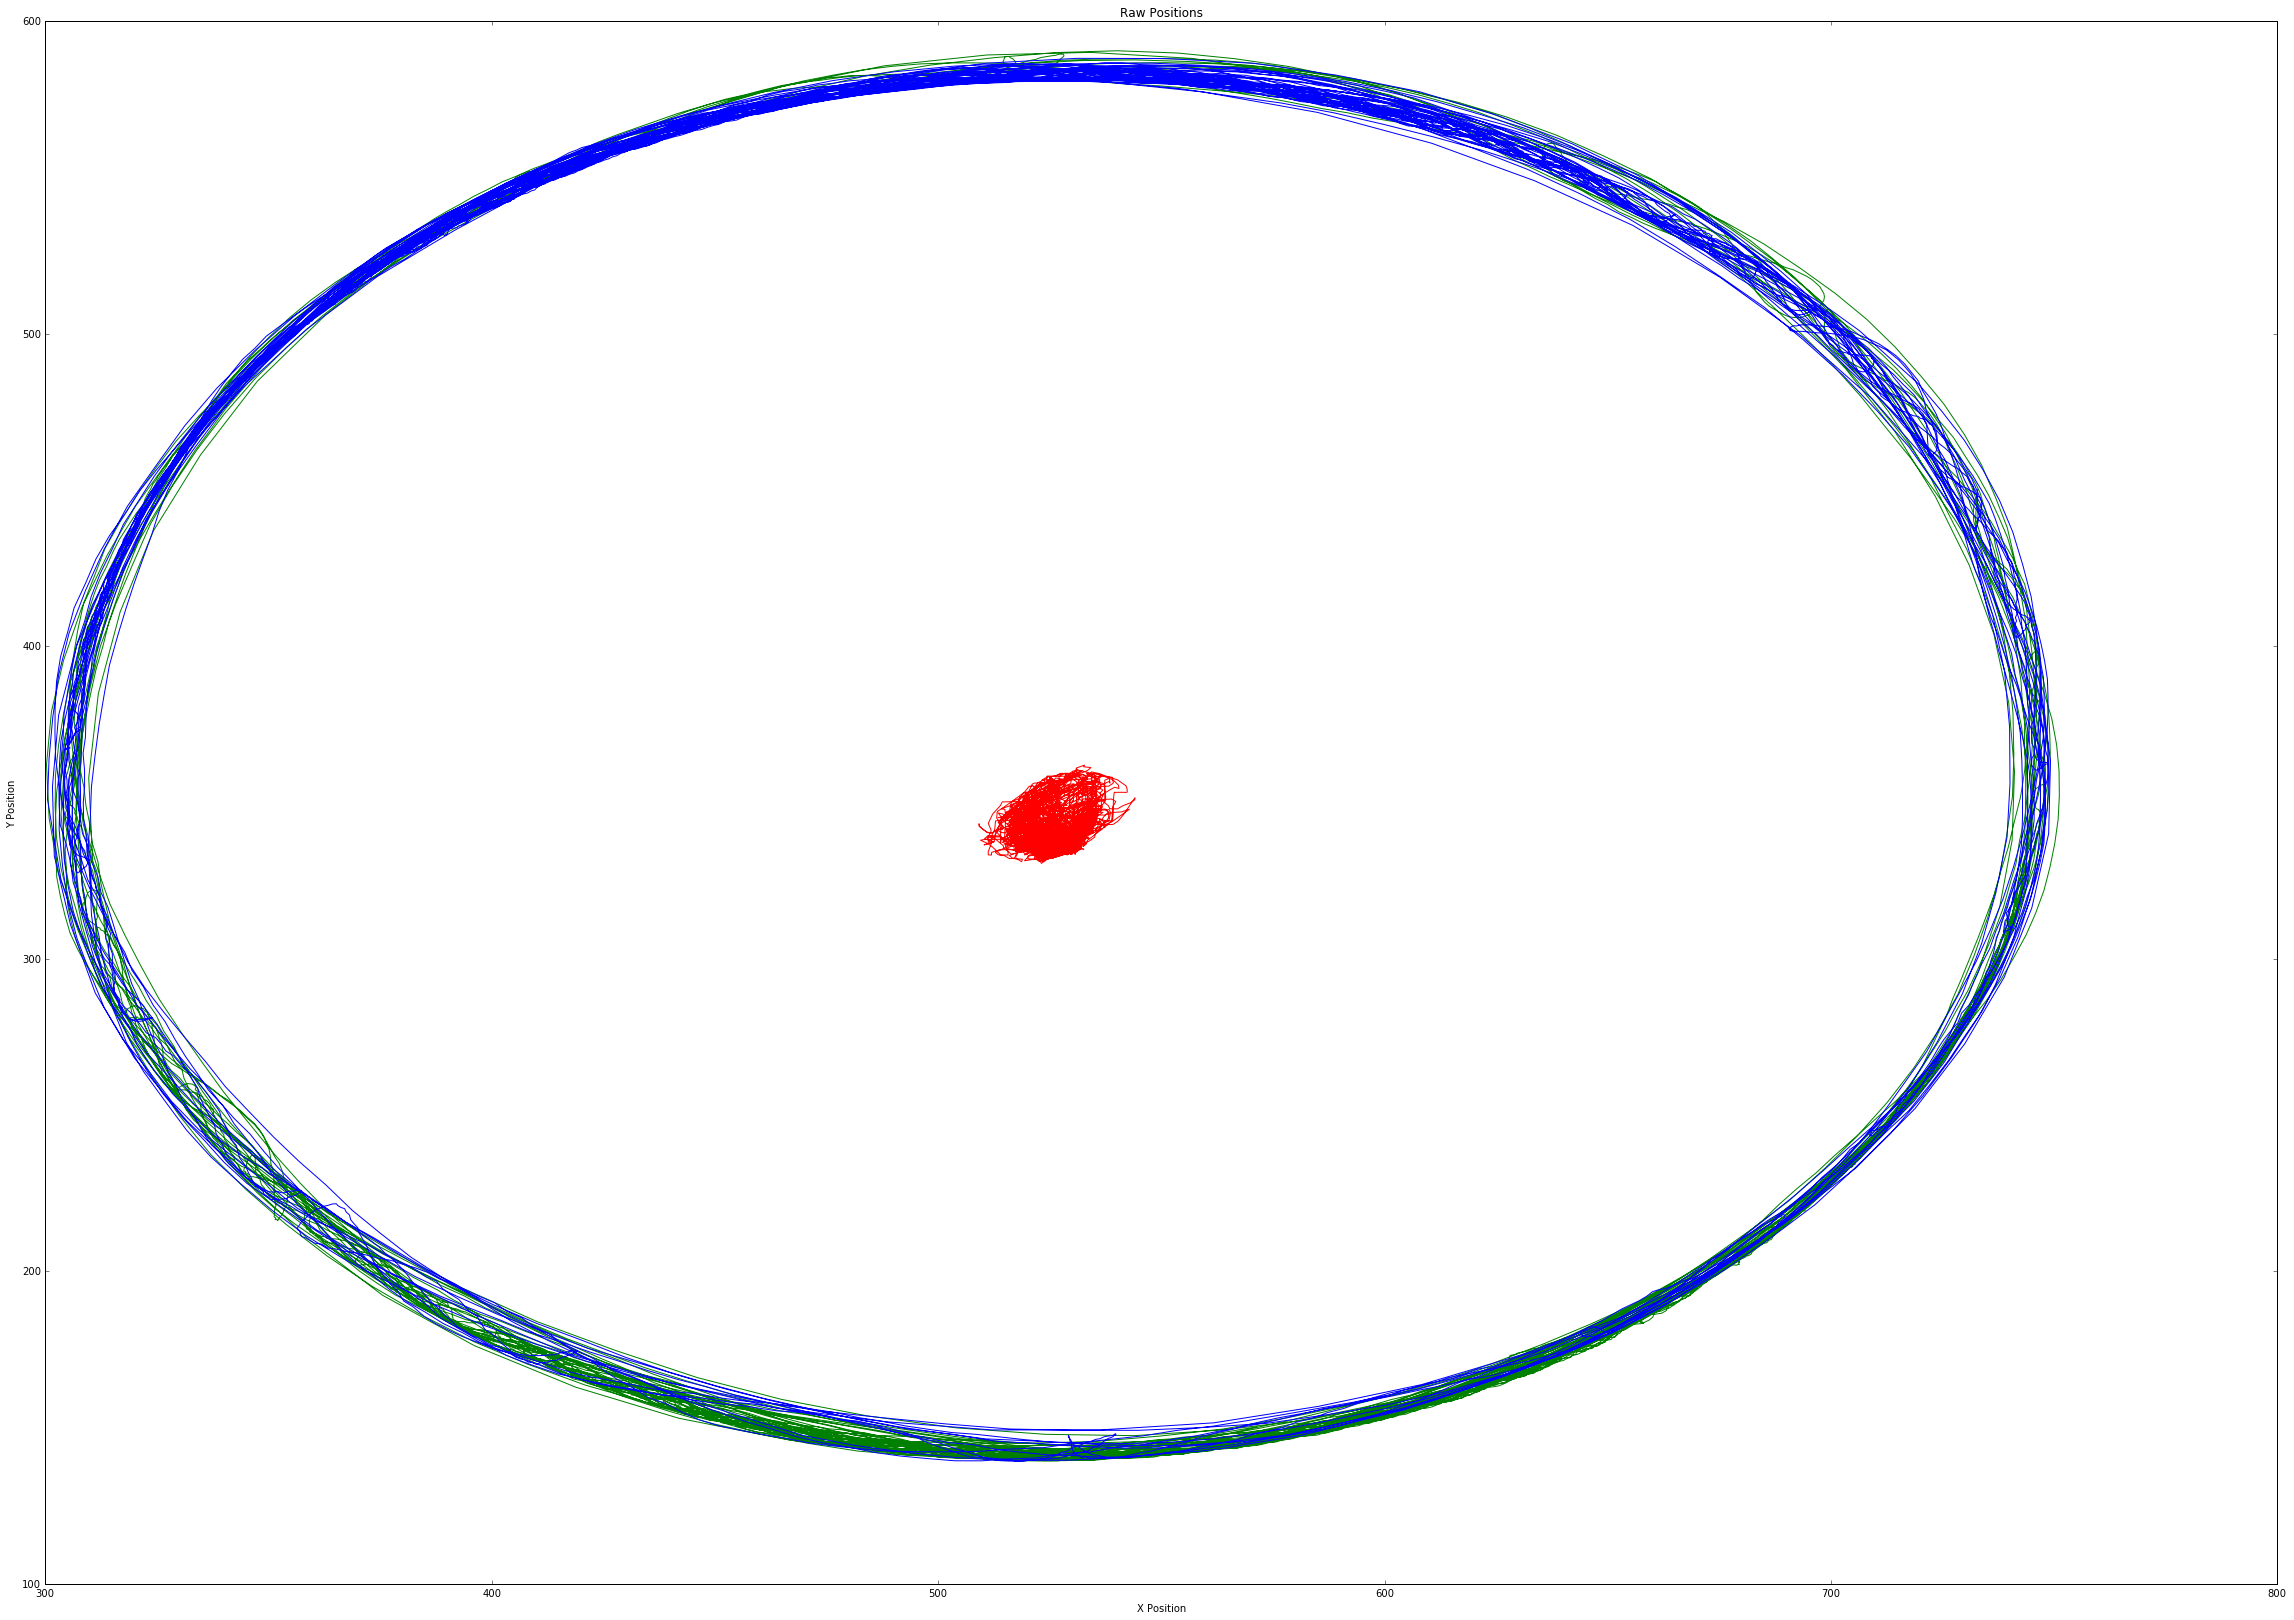

In [33]:
plt.plot(Ax,Ay, 'g')
plt.plot(Bx,By,'b')
plt.plot(xCen,yCen,'r')
plt.title('Raw Positions')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()

Calibrate the raw data to the center dot.  This eliminates the motion due to the fiber's xy oscillations.  Plot the new data.

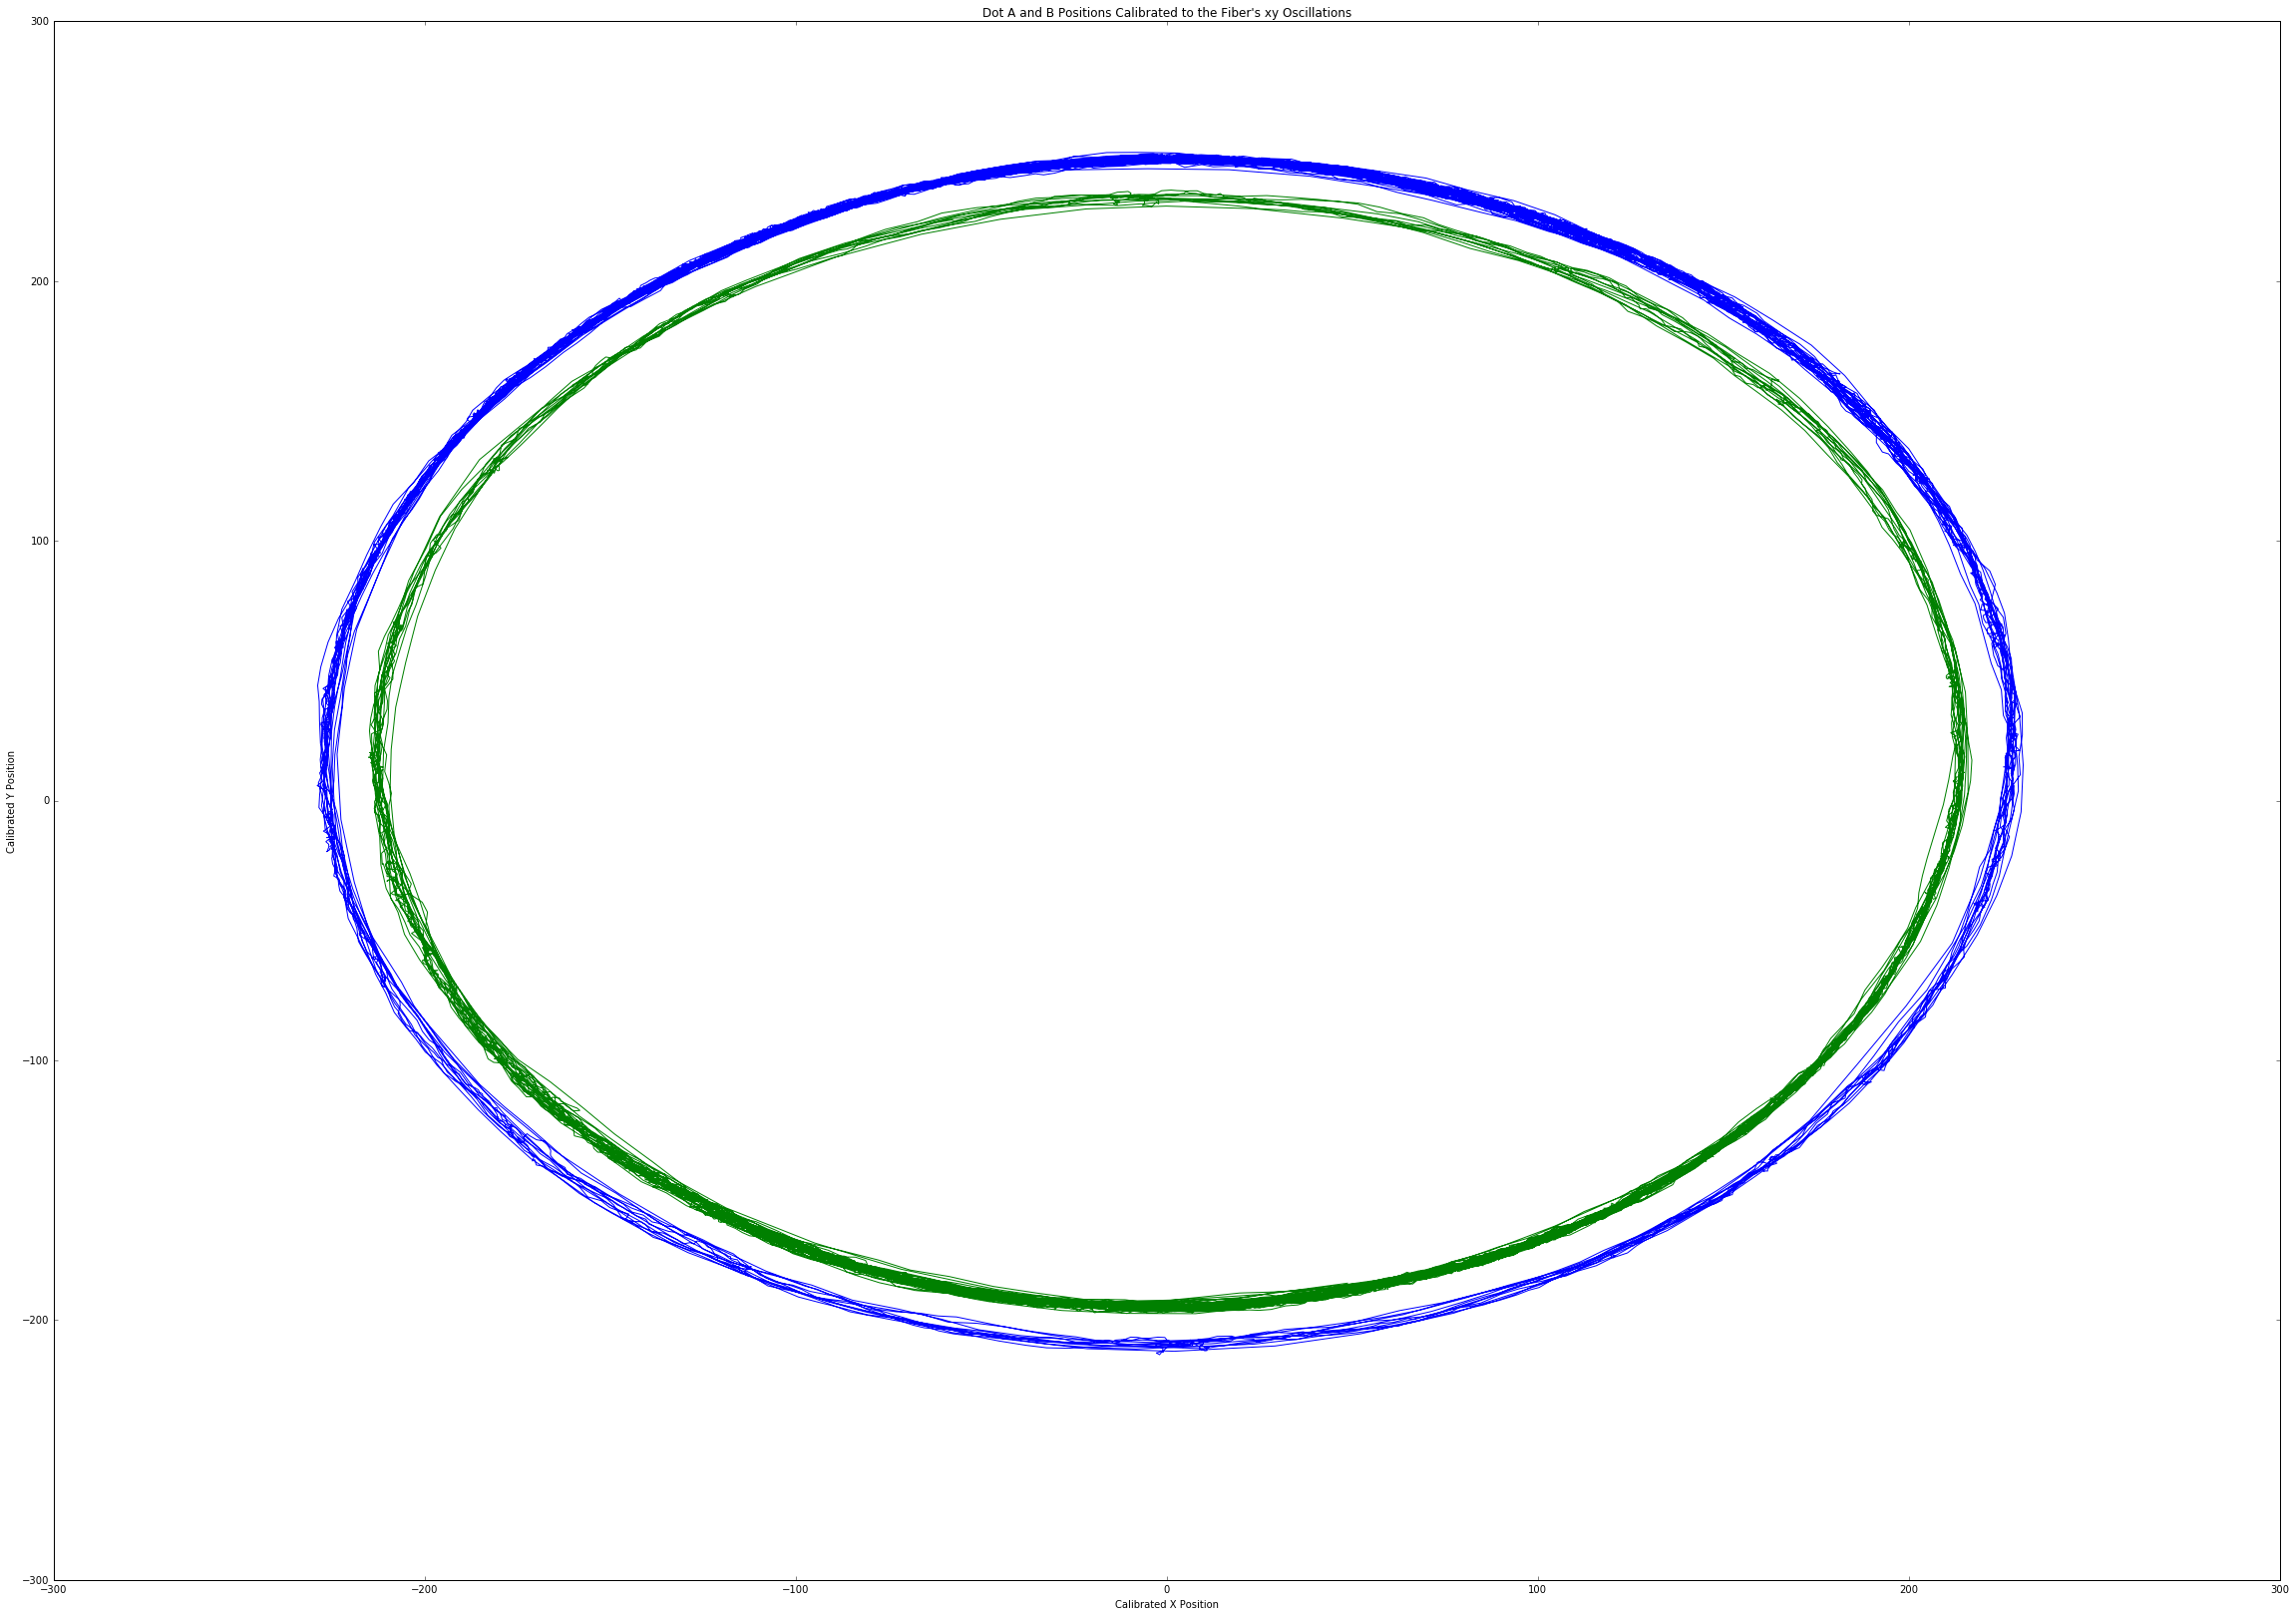

In [34]:
xA_lrg_cal = Ax - xCen
yA_lrg_cal = Ay - yCen
xB_lrg_cal = Bx - xCen
yB_lrg_cal = By - yCen


plt.plot (xA_lrg_cal, yA_lrg_cal, 'g')
plt.plot (xB_lrg_cal, yB_lrg_cal, 'b')
plt.title('Dot A and B Positions Calibrated to the Fiber\'s xy Oscillations')
plt.xlabel('Calibrated X Position')
plt.ylabel('Calibrated Y Position')
plt.show()

Calculate the Midpoint.

In [14]:
midX = (Ax + Bx)*0.5
midY = (Ay + By)*0.5

Now, calibrate the already refined data to the wobble...subtract the motion due to wobble from the x and y positions.

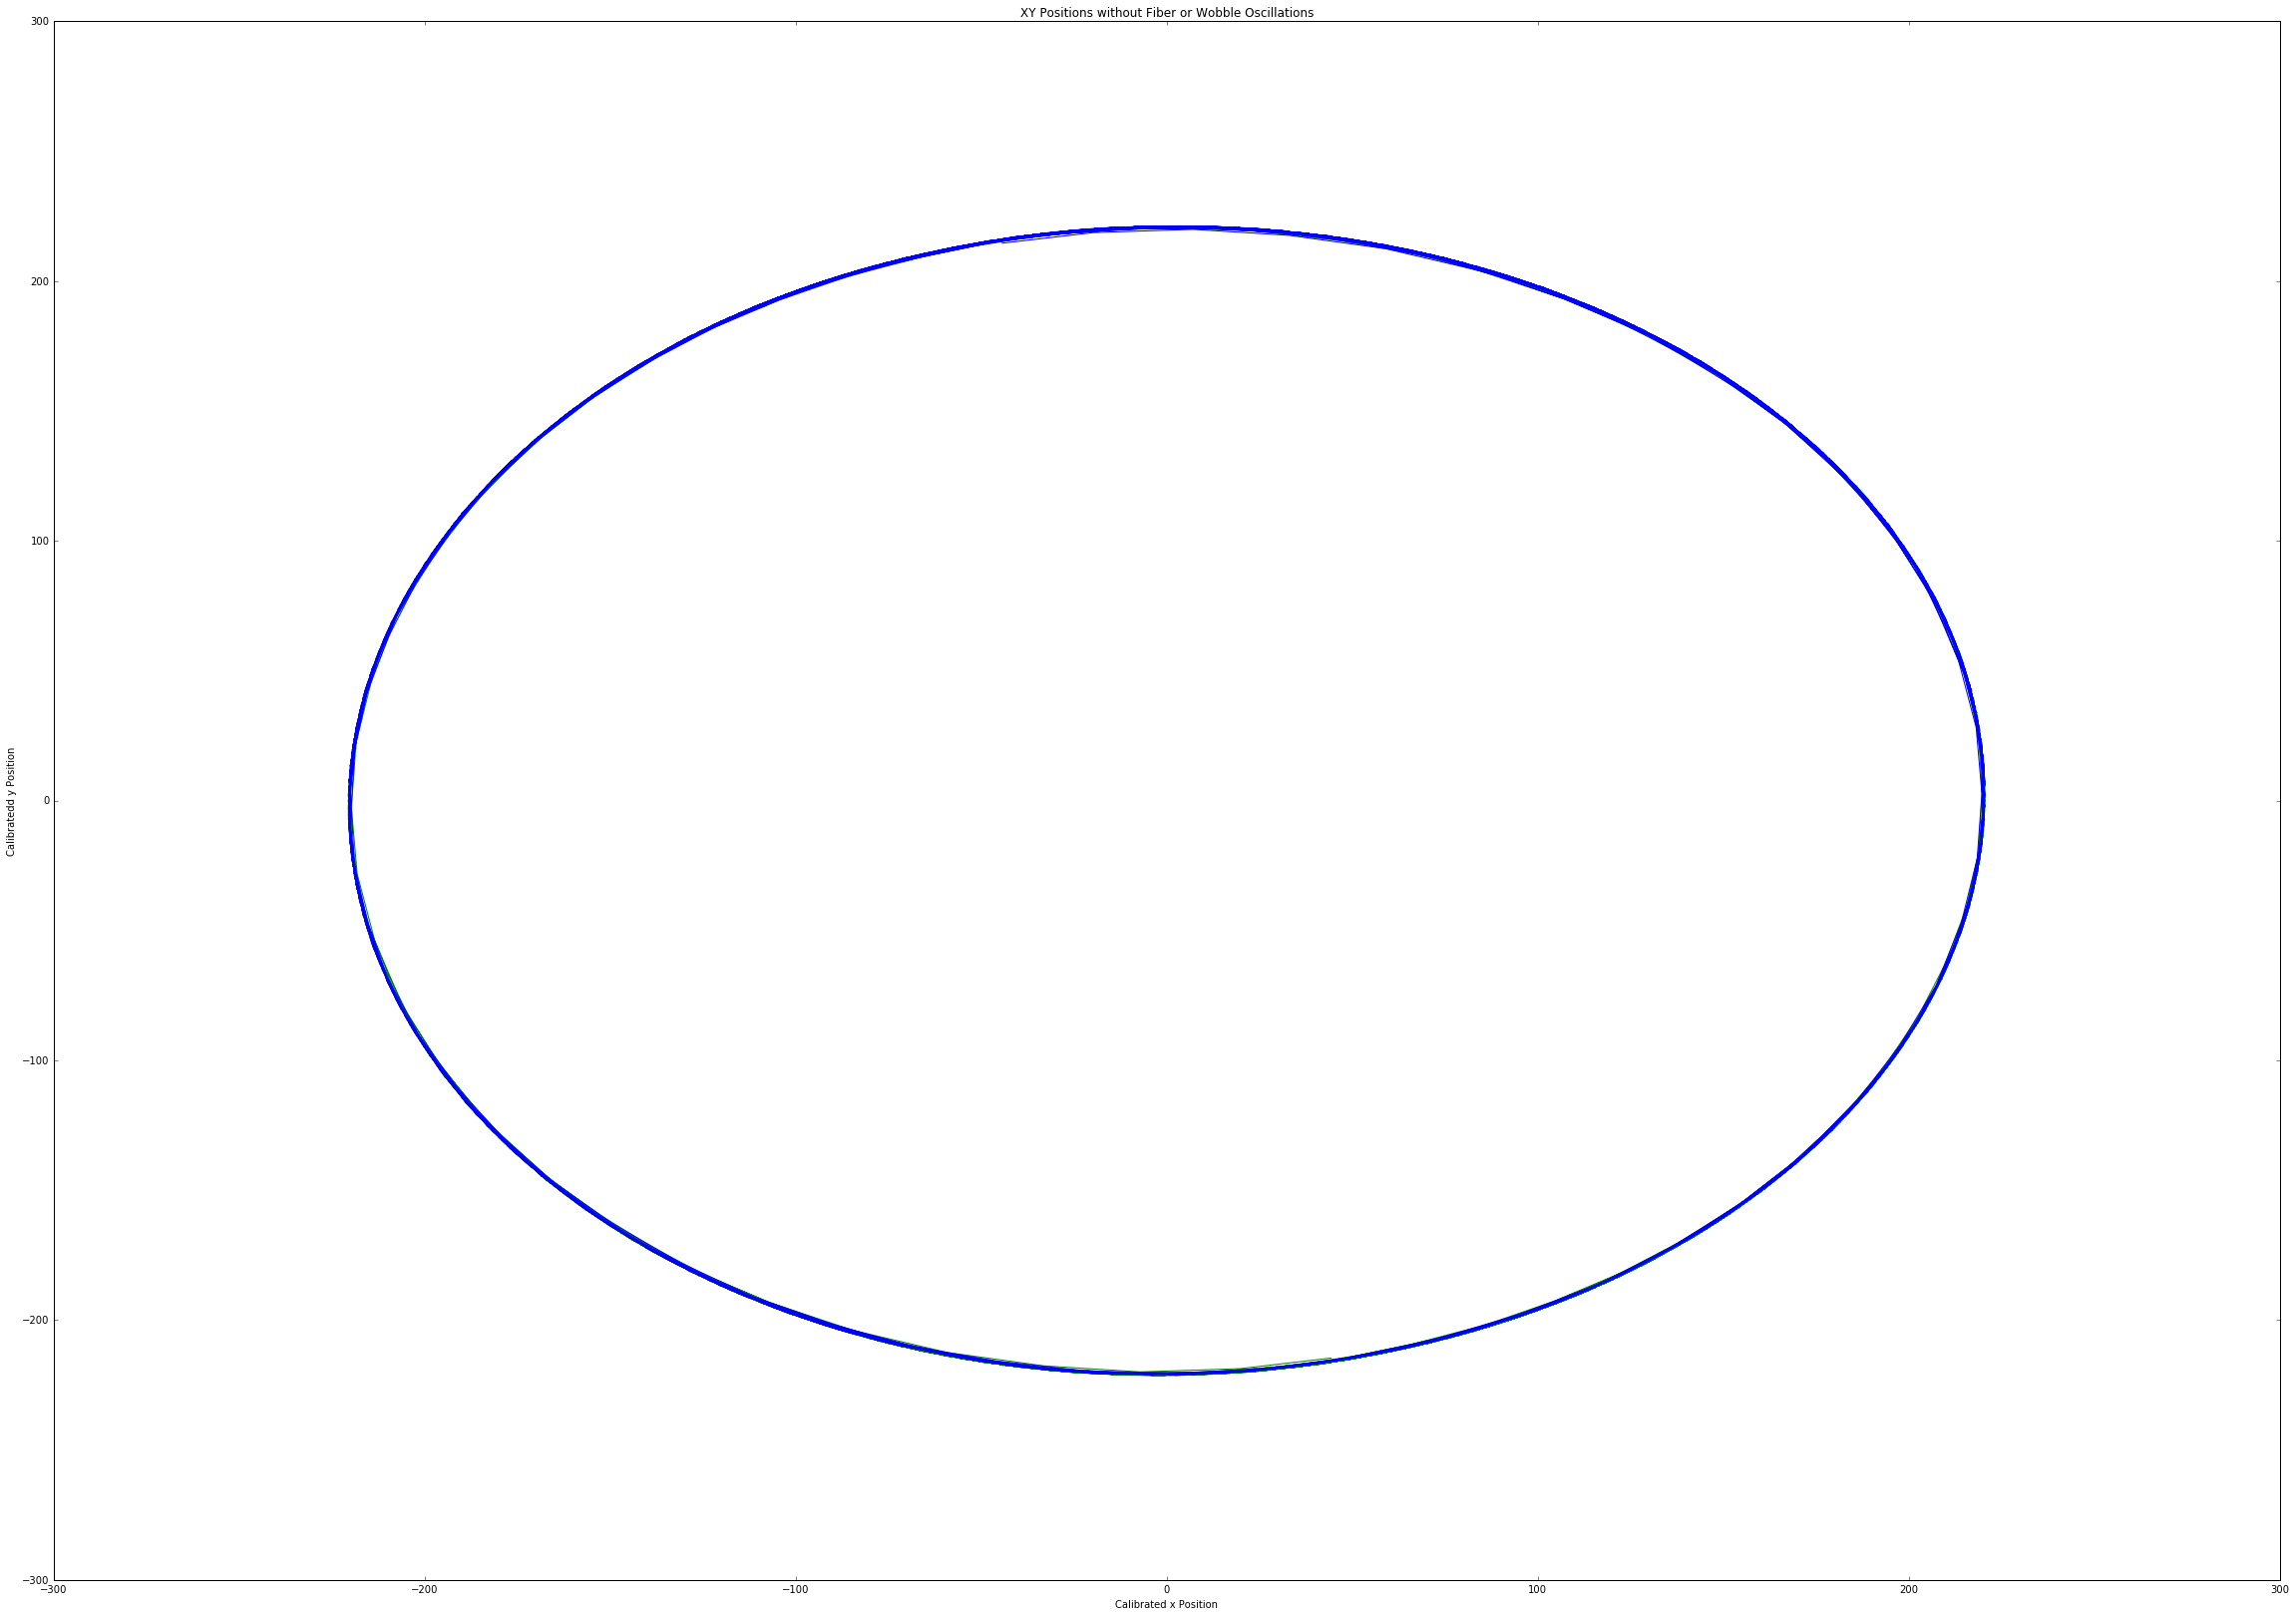

In [35]:
Ax_sansWob = xA_lrg_cal +(xCen - midX)
Ay_sansWob = yA_lrg_cal +(yCen - midY)
Bx_sansWob = xB_lrg_cal +(xCen - midX)
By_sansWob = yB_lrg_cal + (yCen - midY)

plt.plot (Ax_sansWob, Ay_sansWob,'g')
plt.plot (Bx_sansWob, By_sansWob,'b')
plt.title ('XY Positions without Fiber or Wobble Oscillations')
plt.xlabel ('Calibrated x Position')
plt.ylabel ('Calibratedd y Position')
plt.show()

Note: the above graph depicts motion due only to rotation and to rocking.  We can also achieve the above graph by simply calculating the rotation of dots A and B by subtracting the midpoint from the raw data.

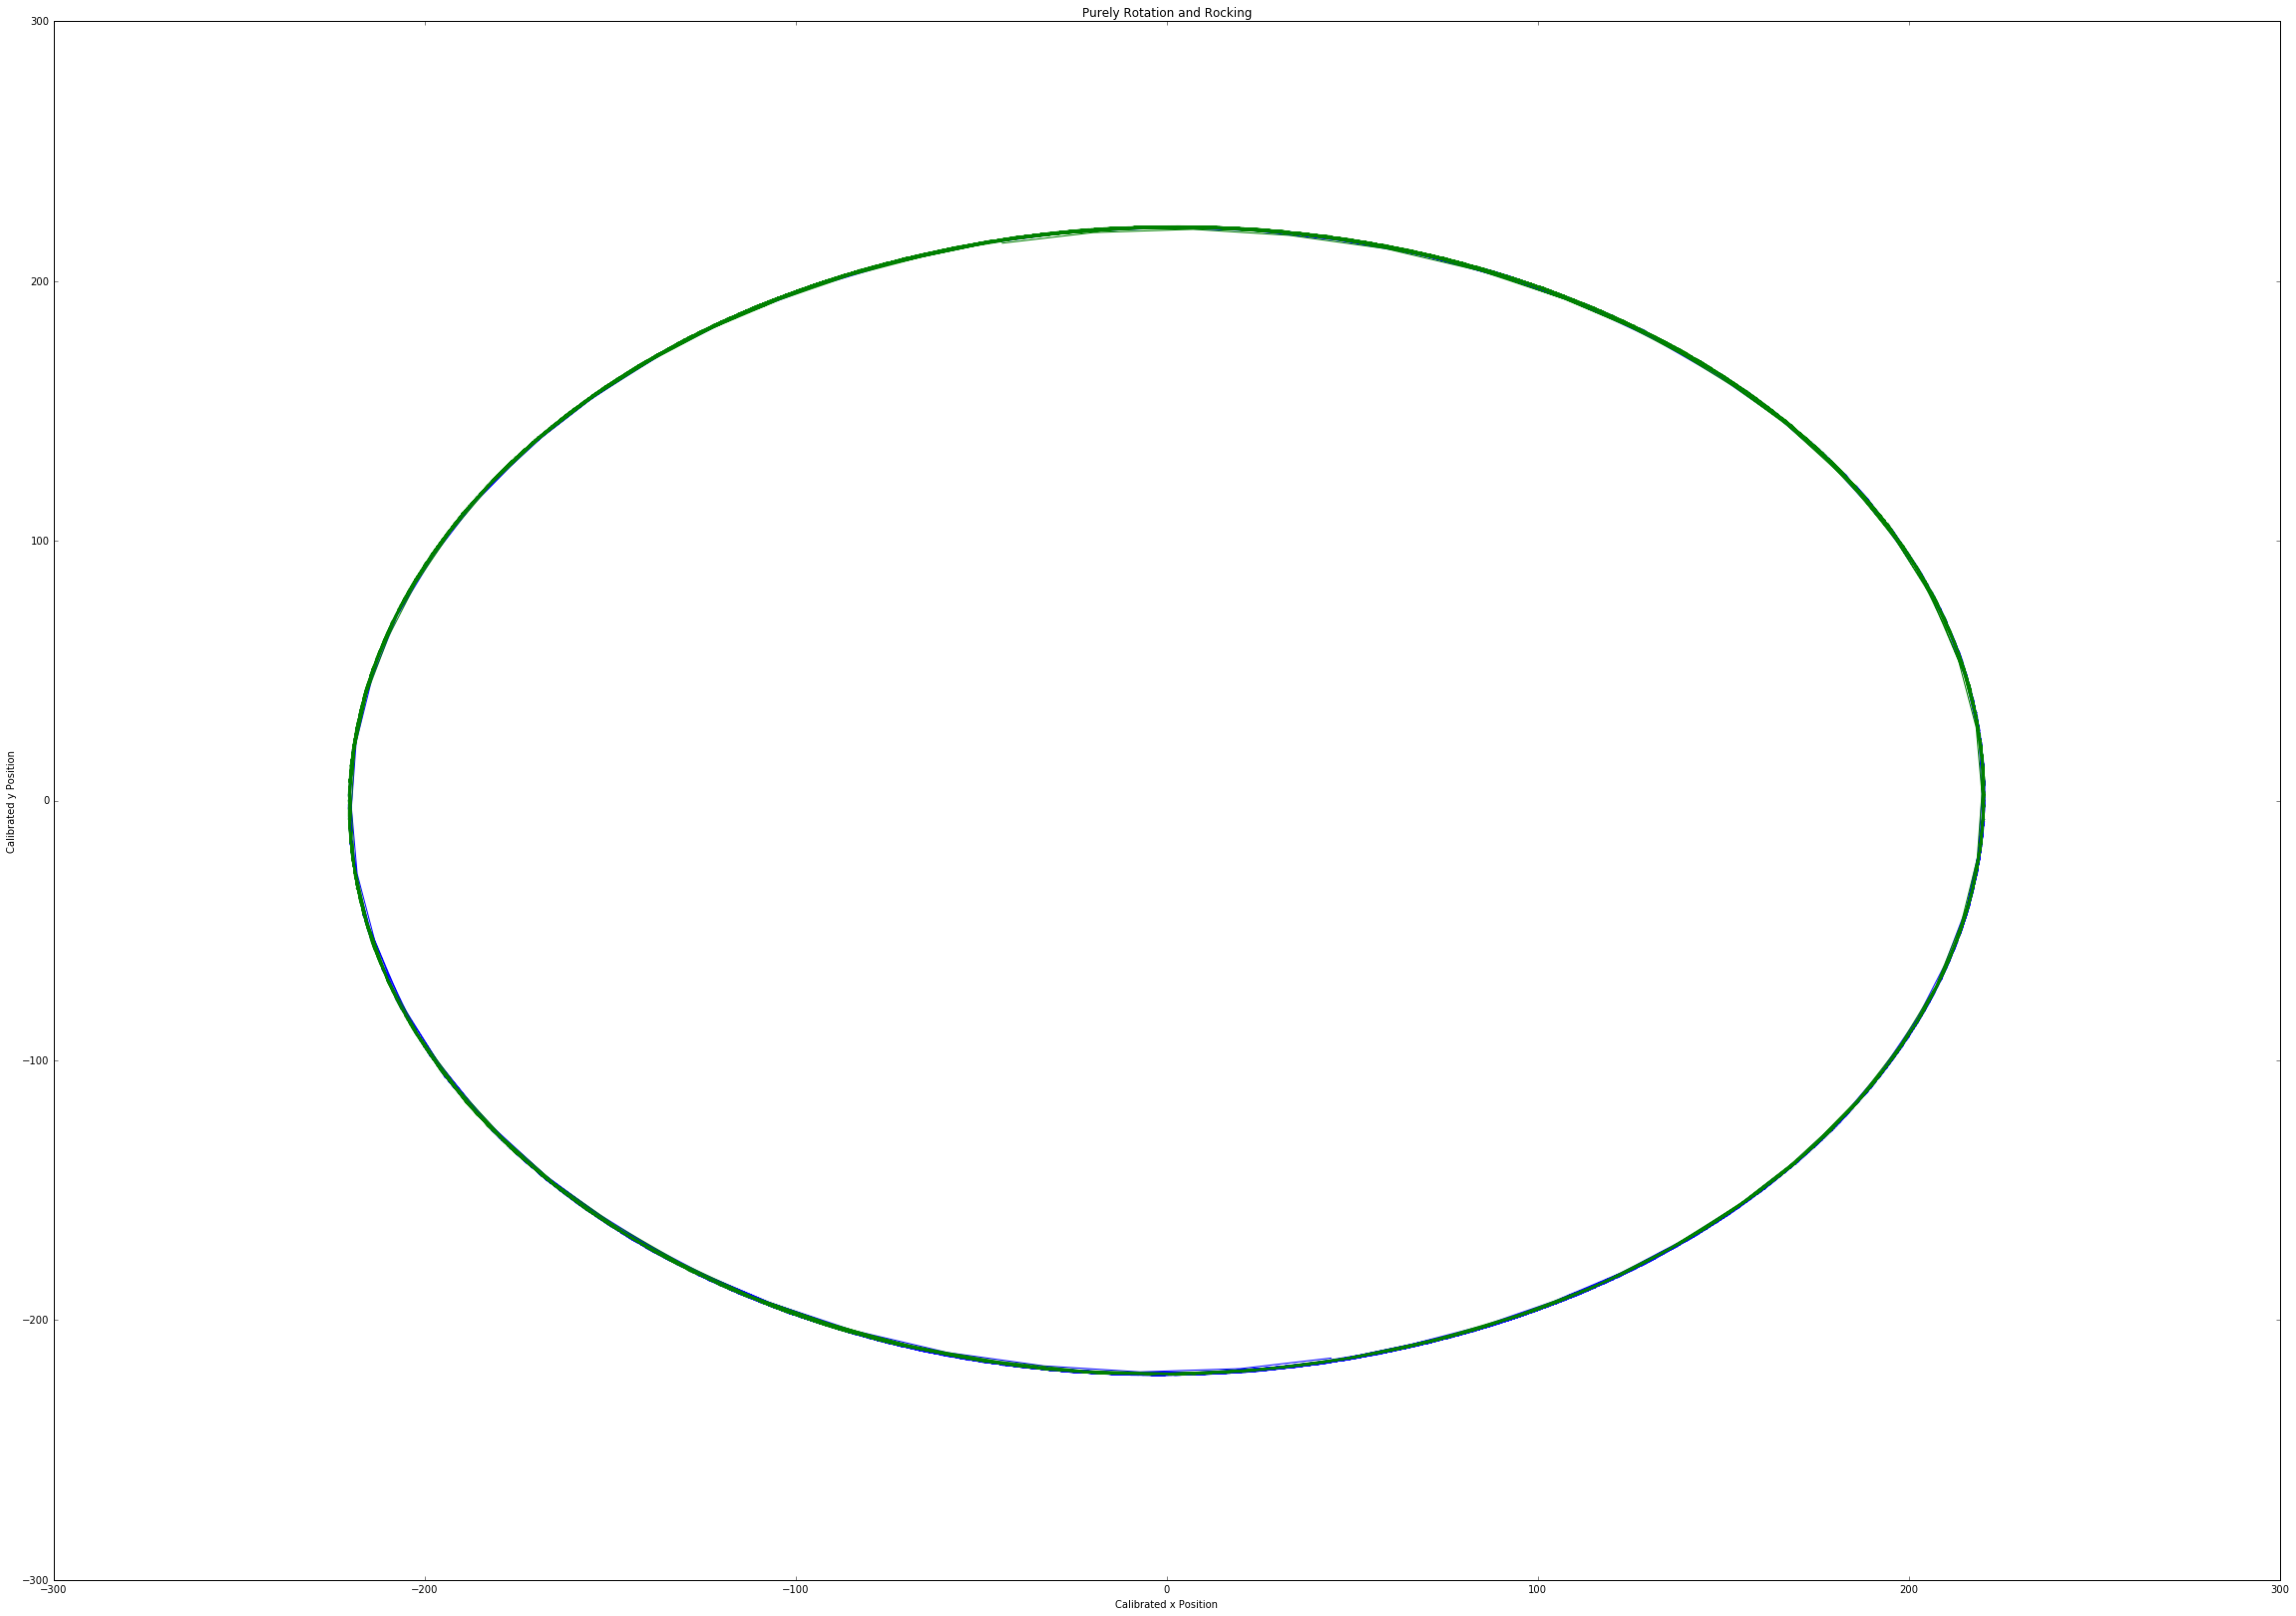

In [36]:
ArotX = Ax - midX
ArotY = Ay - midY
BrotX = Bx - midX
BrotY = By - midY

plt.plot(ArotX,ArotY)
plt.plot(BrotX,BrotY)
#plt.plot(midX,midY)
plt.title('Purely Rotation and Rocking')
plt.xlabel('Calibrated x Position')
plt.ylabel('Calibrated y Position')
plt.show()

Now, separate out the wobble and graph it:
For this, we must use the law of cosines. Here, we use the triangle formed by the two side dots, A and B, and the center dot C.  The angle theta measured is the angle between sides BA and BC, with B as the vertex. We calculate the angle, and then find the vertical projection onto the horizontal camera view plane of the distance the center dot wobbles.  

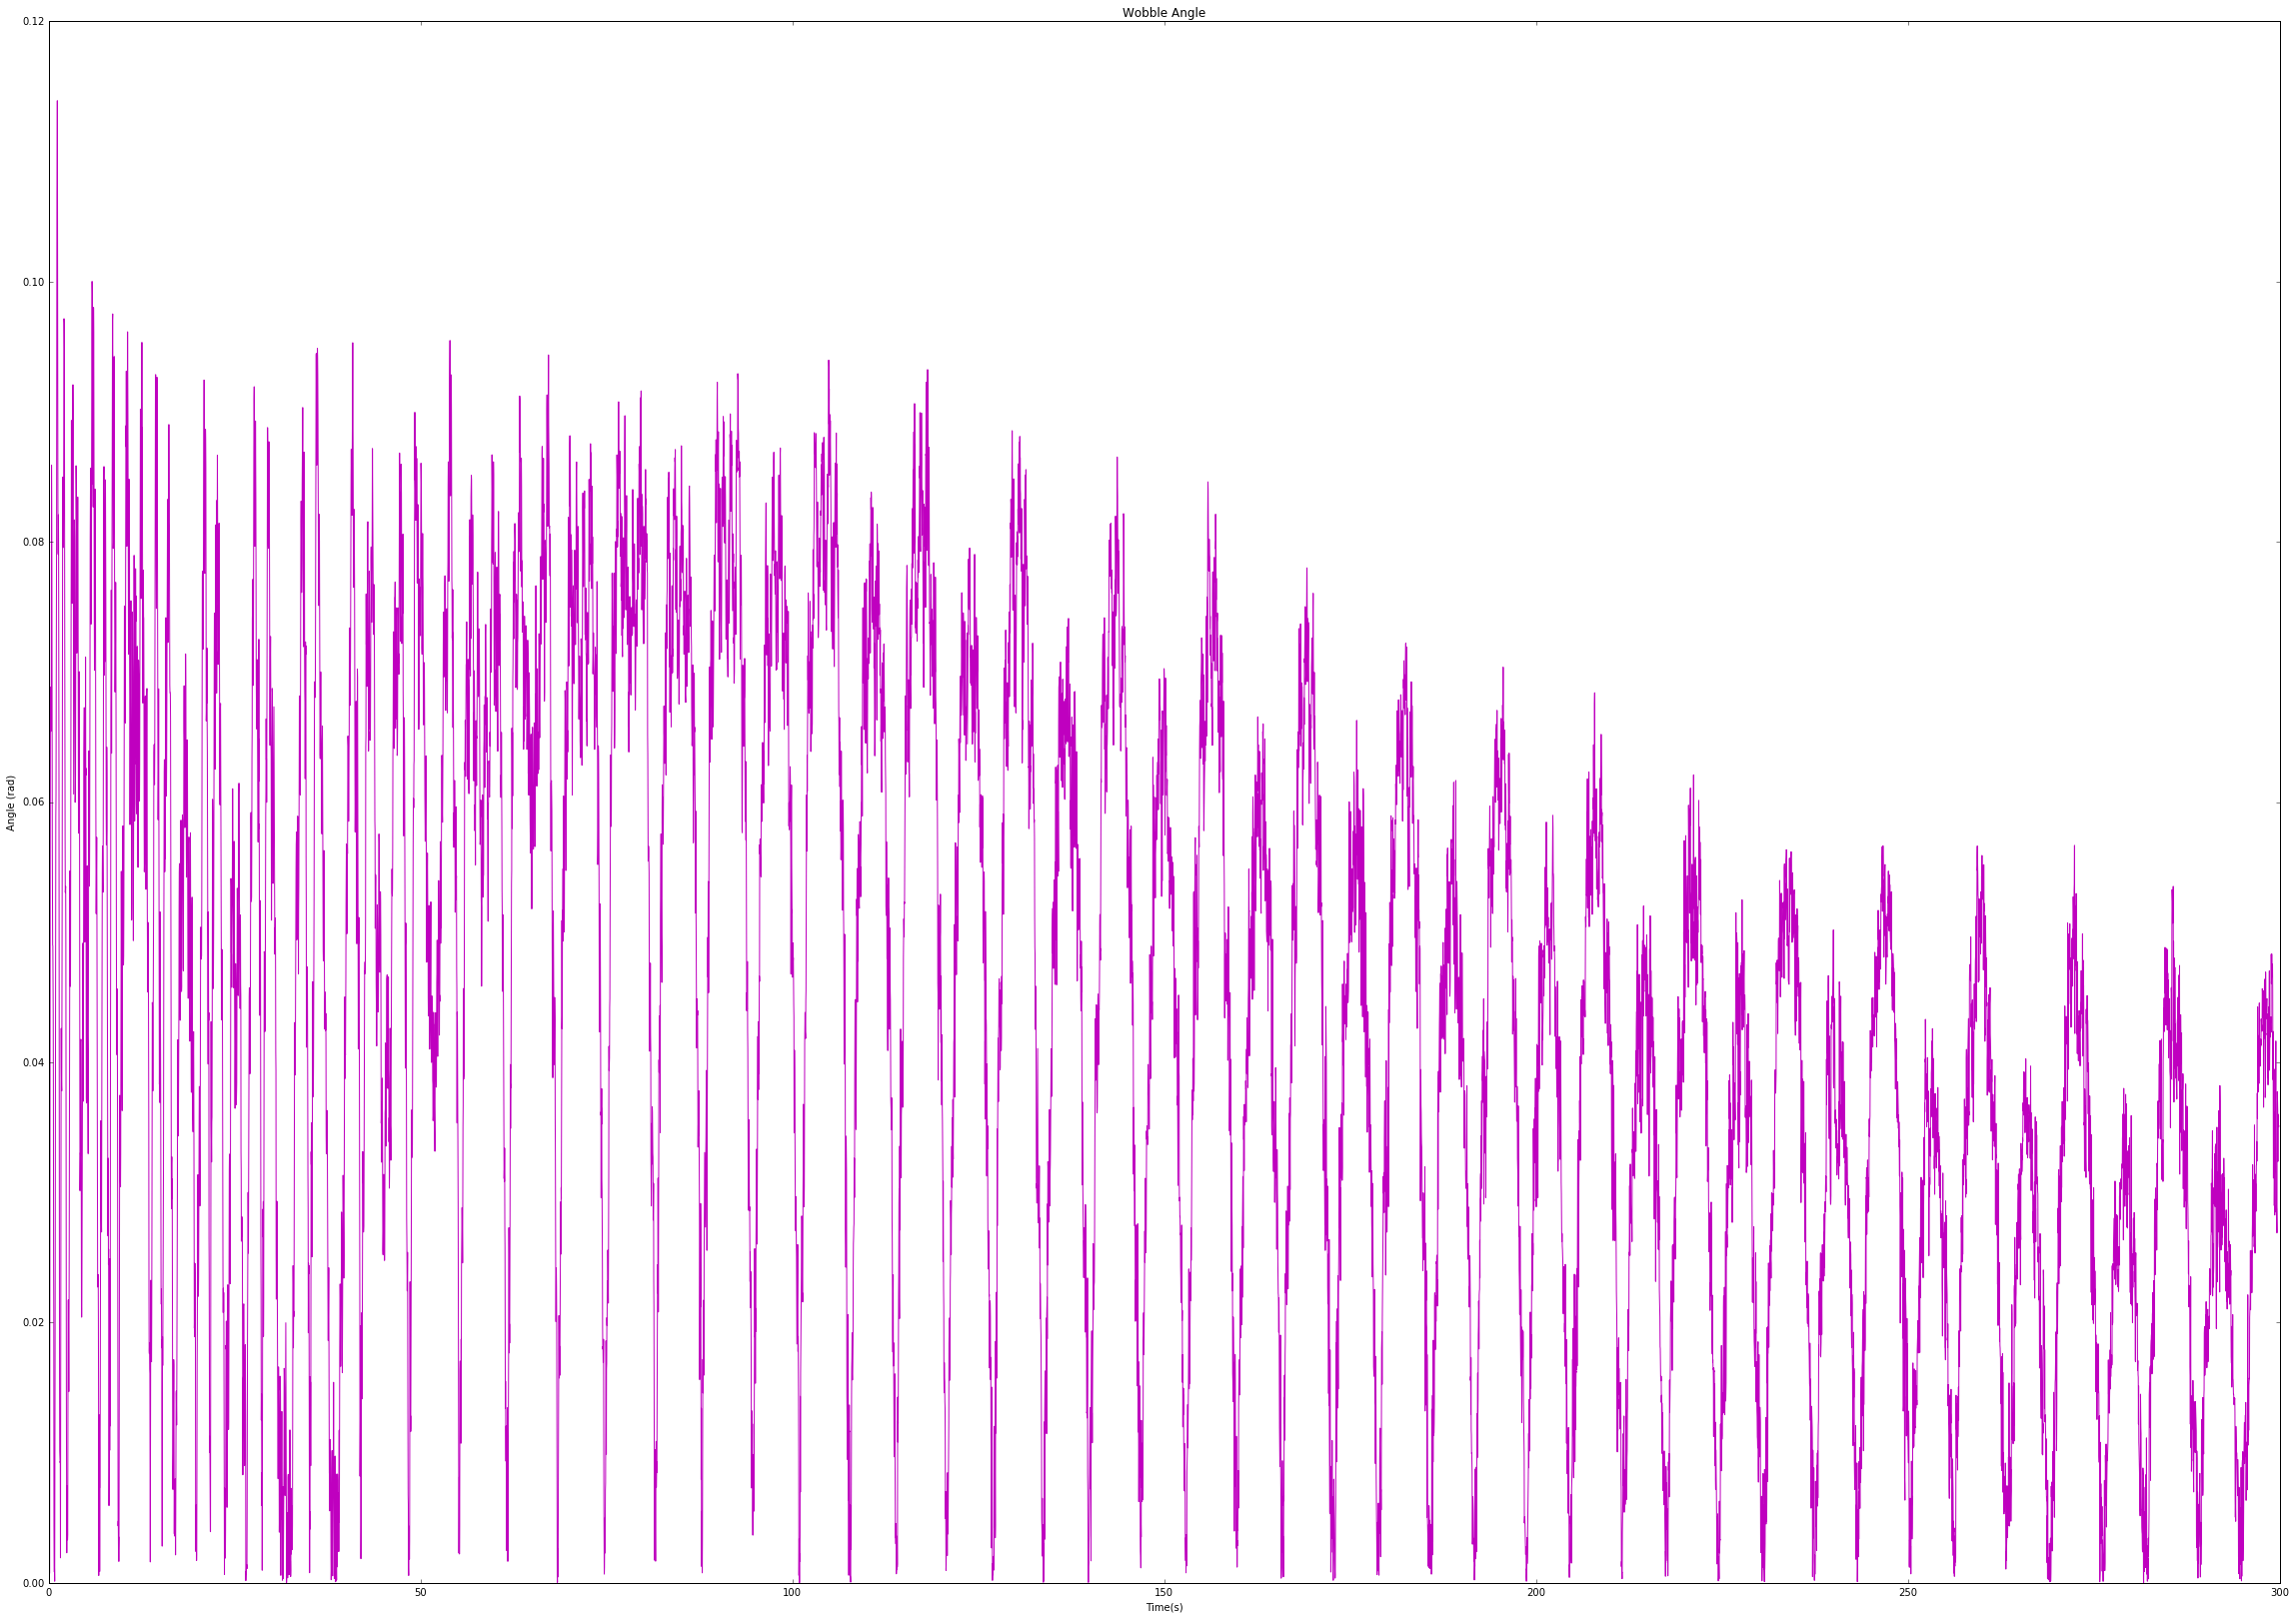

<function matplotlib.pyplot.show>

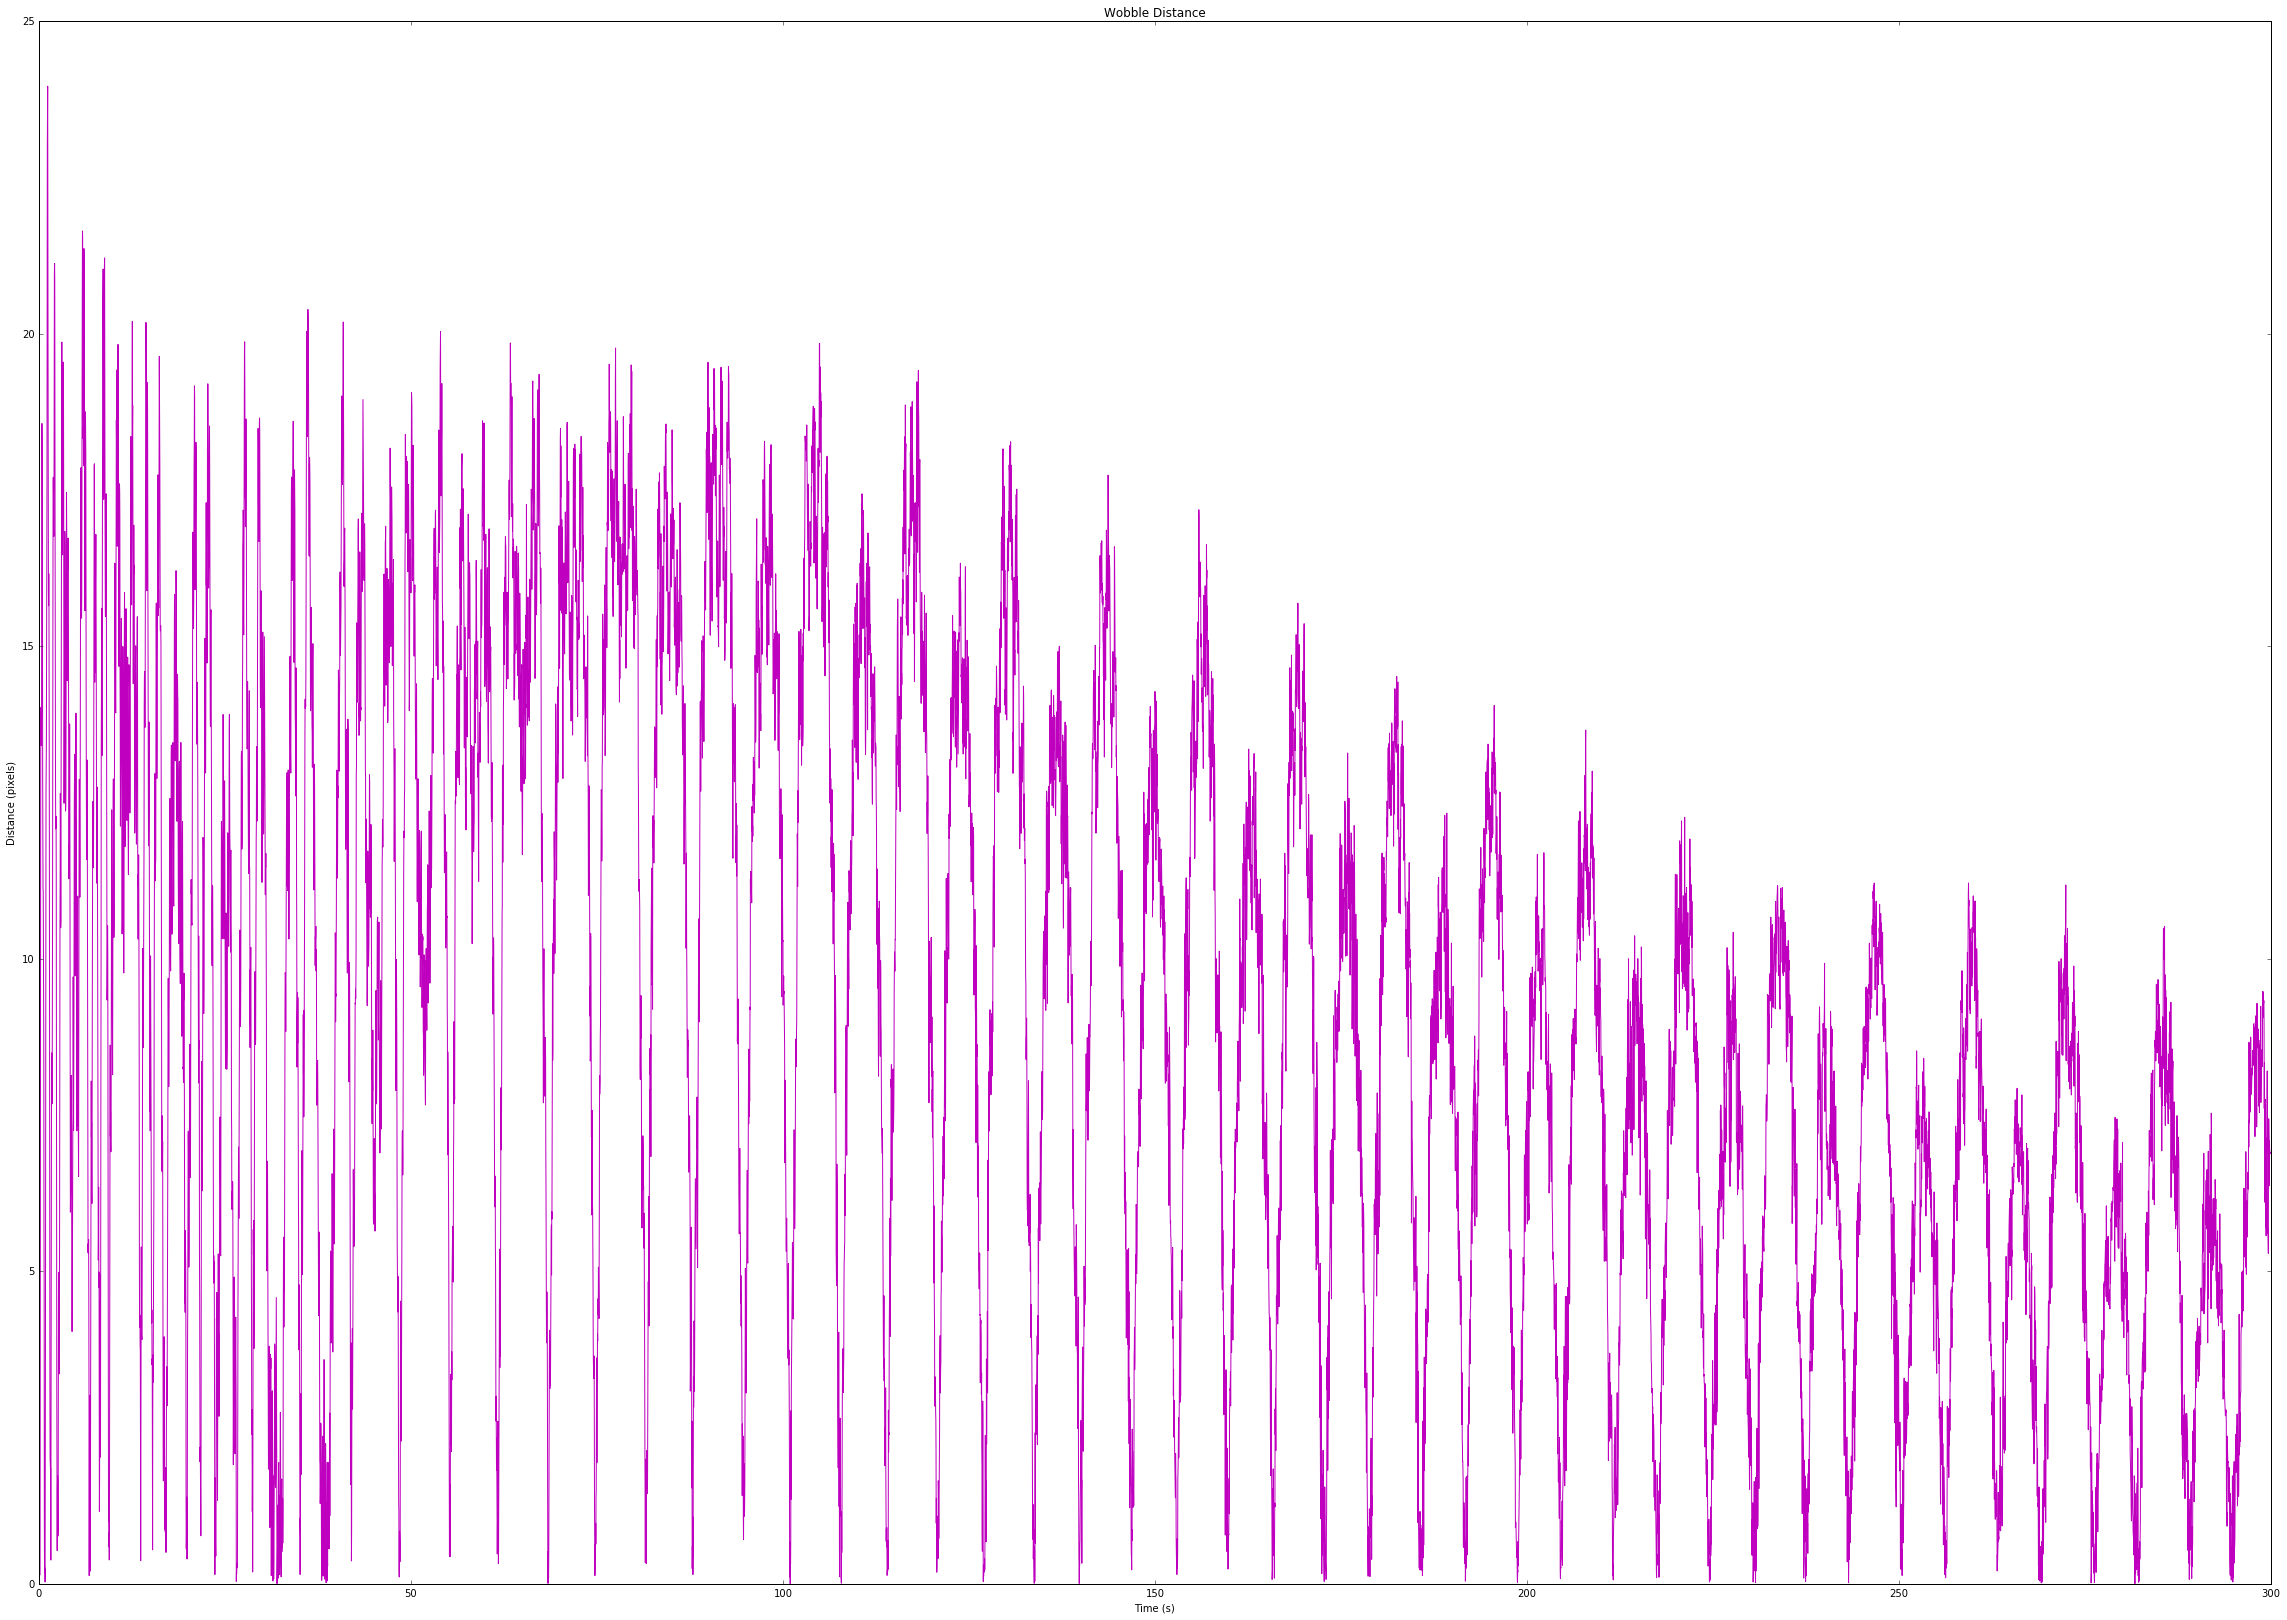

In [37]:
AC = ((xA_lrg_cal)**2 + (yA_lrg_cal)**2)**0.5
BC = ((xB_lrg_cal)**2 + (yB_lrg_cal)**2)**0.5
#AB = ((Ax- Bx)**2 + (Ay - By)**2)**0.5
AB = ((xA_lrg_cal-xB_lrg_cal)**2 + (yA_lrg_cal - yB_lrg_cal)**2)**0.5

wob_Th = np.arccos((AC**2 +AB**2 -BC**2)/(2*AC*AB))
plt.plot(time,wob_Th,'m')
plt.title('Wobble Angle')
plt.xlabel('Time(s)')
plt.ylabel('Angle (rad)')
plt.show()

wobDis = AC*np.sin(wob_Th)

plt.plot (time, wobDis,'m')
plt.title('Wobble Distance')
plt.xlabel('Time (s)')
plt.ylabel('Distance (pixels)')
plt.show

Now, the 'rocking' mode is analyzed:
To calculate the angle the ring rocks through, the radius of the ring (scaled to pixels) need to be known, and the distance between the midpoint and a side dot (here A) needs to be calculated. This calculation relies on the fact that the vertical projection onto the horizontal camera plane of the center of the ring will always lie halfway between the vertical projections of dots A and B (after the wobble has been taken out).  This is described in the lab notebook.

Note: We need to recalculate the midpoint to the already calibrated x and y positions.

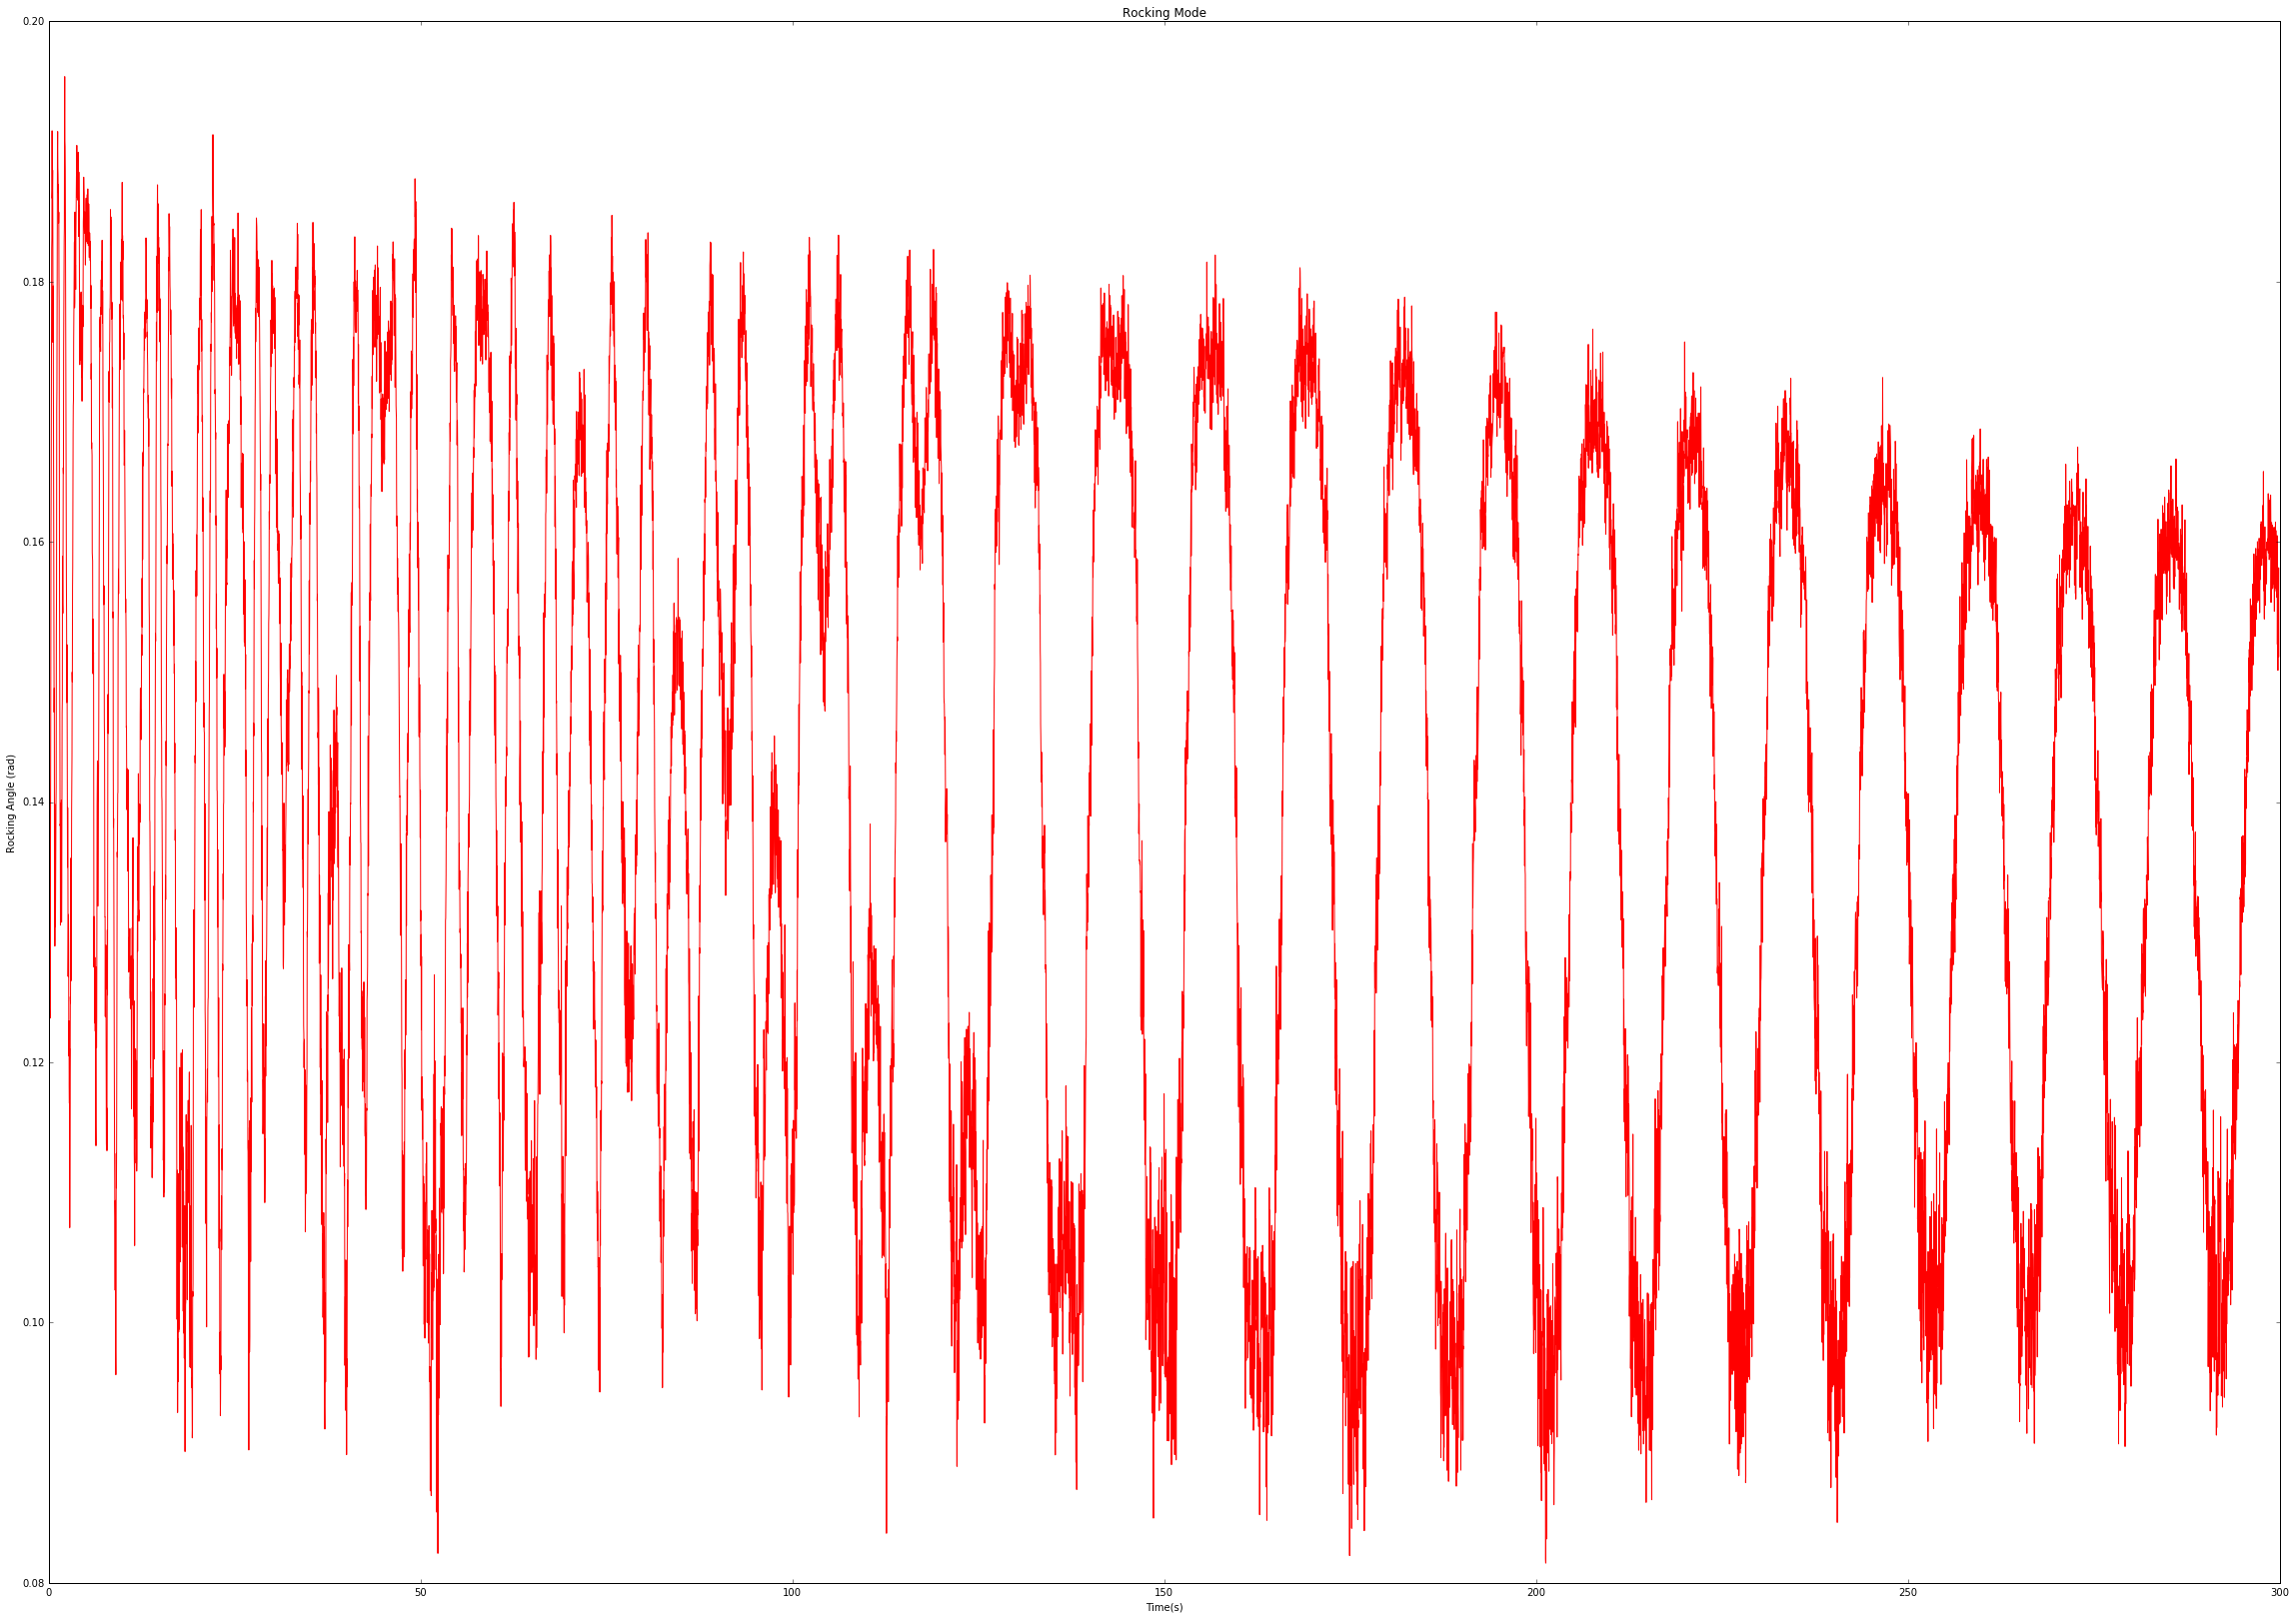

In [38]:
midX_rock = (ArotX + BrotX)*0.5
midY_rock = (ArotY + BrotY)*0.5

AM = ((ArotX - midX_rock)**2 + (ArotY - midY_rock)**2)**0.5


rock_Th = (np.arccos(AM/radius))

plt.plot (time, rock_Th,'r')
plt.title('Rocking Mode')
plt.xlabel('Time(s)')
plt.ylabel('Rocking Angle (rad)')
plt.show()


In [19]:
print(np.mean(rock_Th))
r_Th_max_rad = (np.max(abs(rock_Th - np.mean(rock_Th))))
r_Th_max_deg = r_Th_max_rad * 360/(2*np.pi)
z = print(r_Th_max_rad)
h = print(r_Th_max_deg)
print('The maximum angle the ring rocks through is %s radians, which is %s degrees.'%(r_Th_max_rad,r_Th_max_deg))

0.140067653316
0.0585531980374
3.35485112454
The maximum angle the ring rocks through is 0.0585531980374 radians, which is 3.35485112454 degrees.


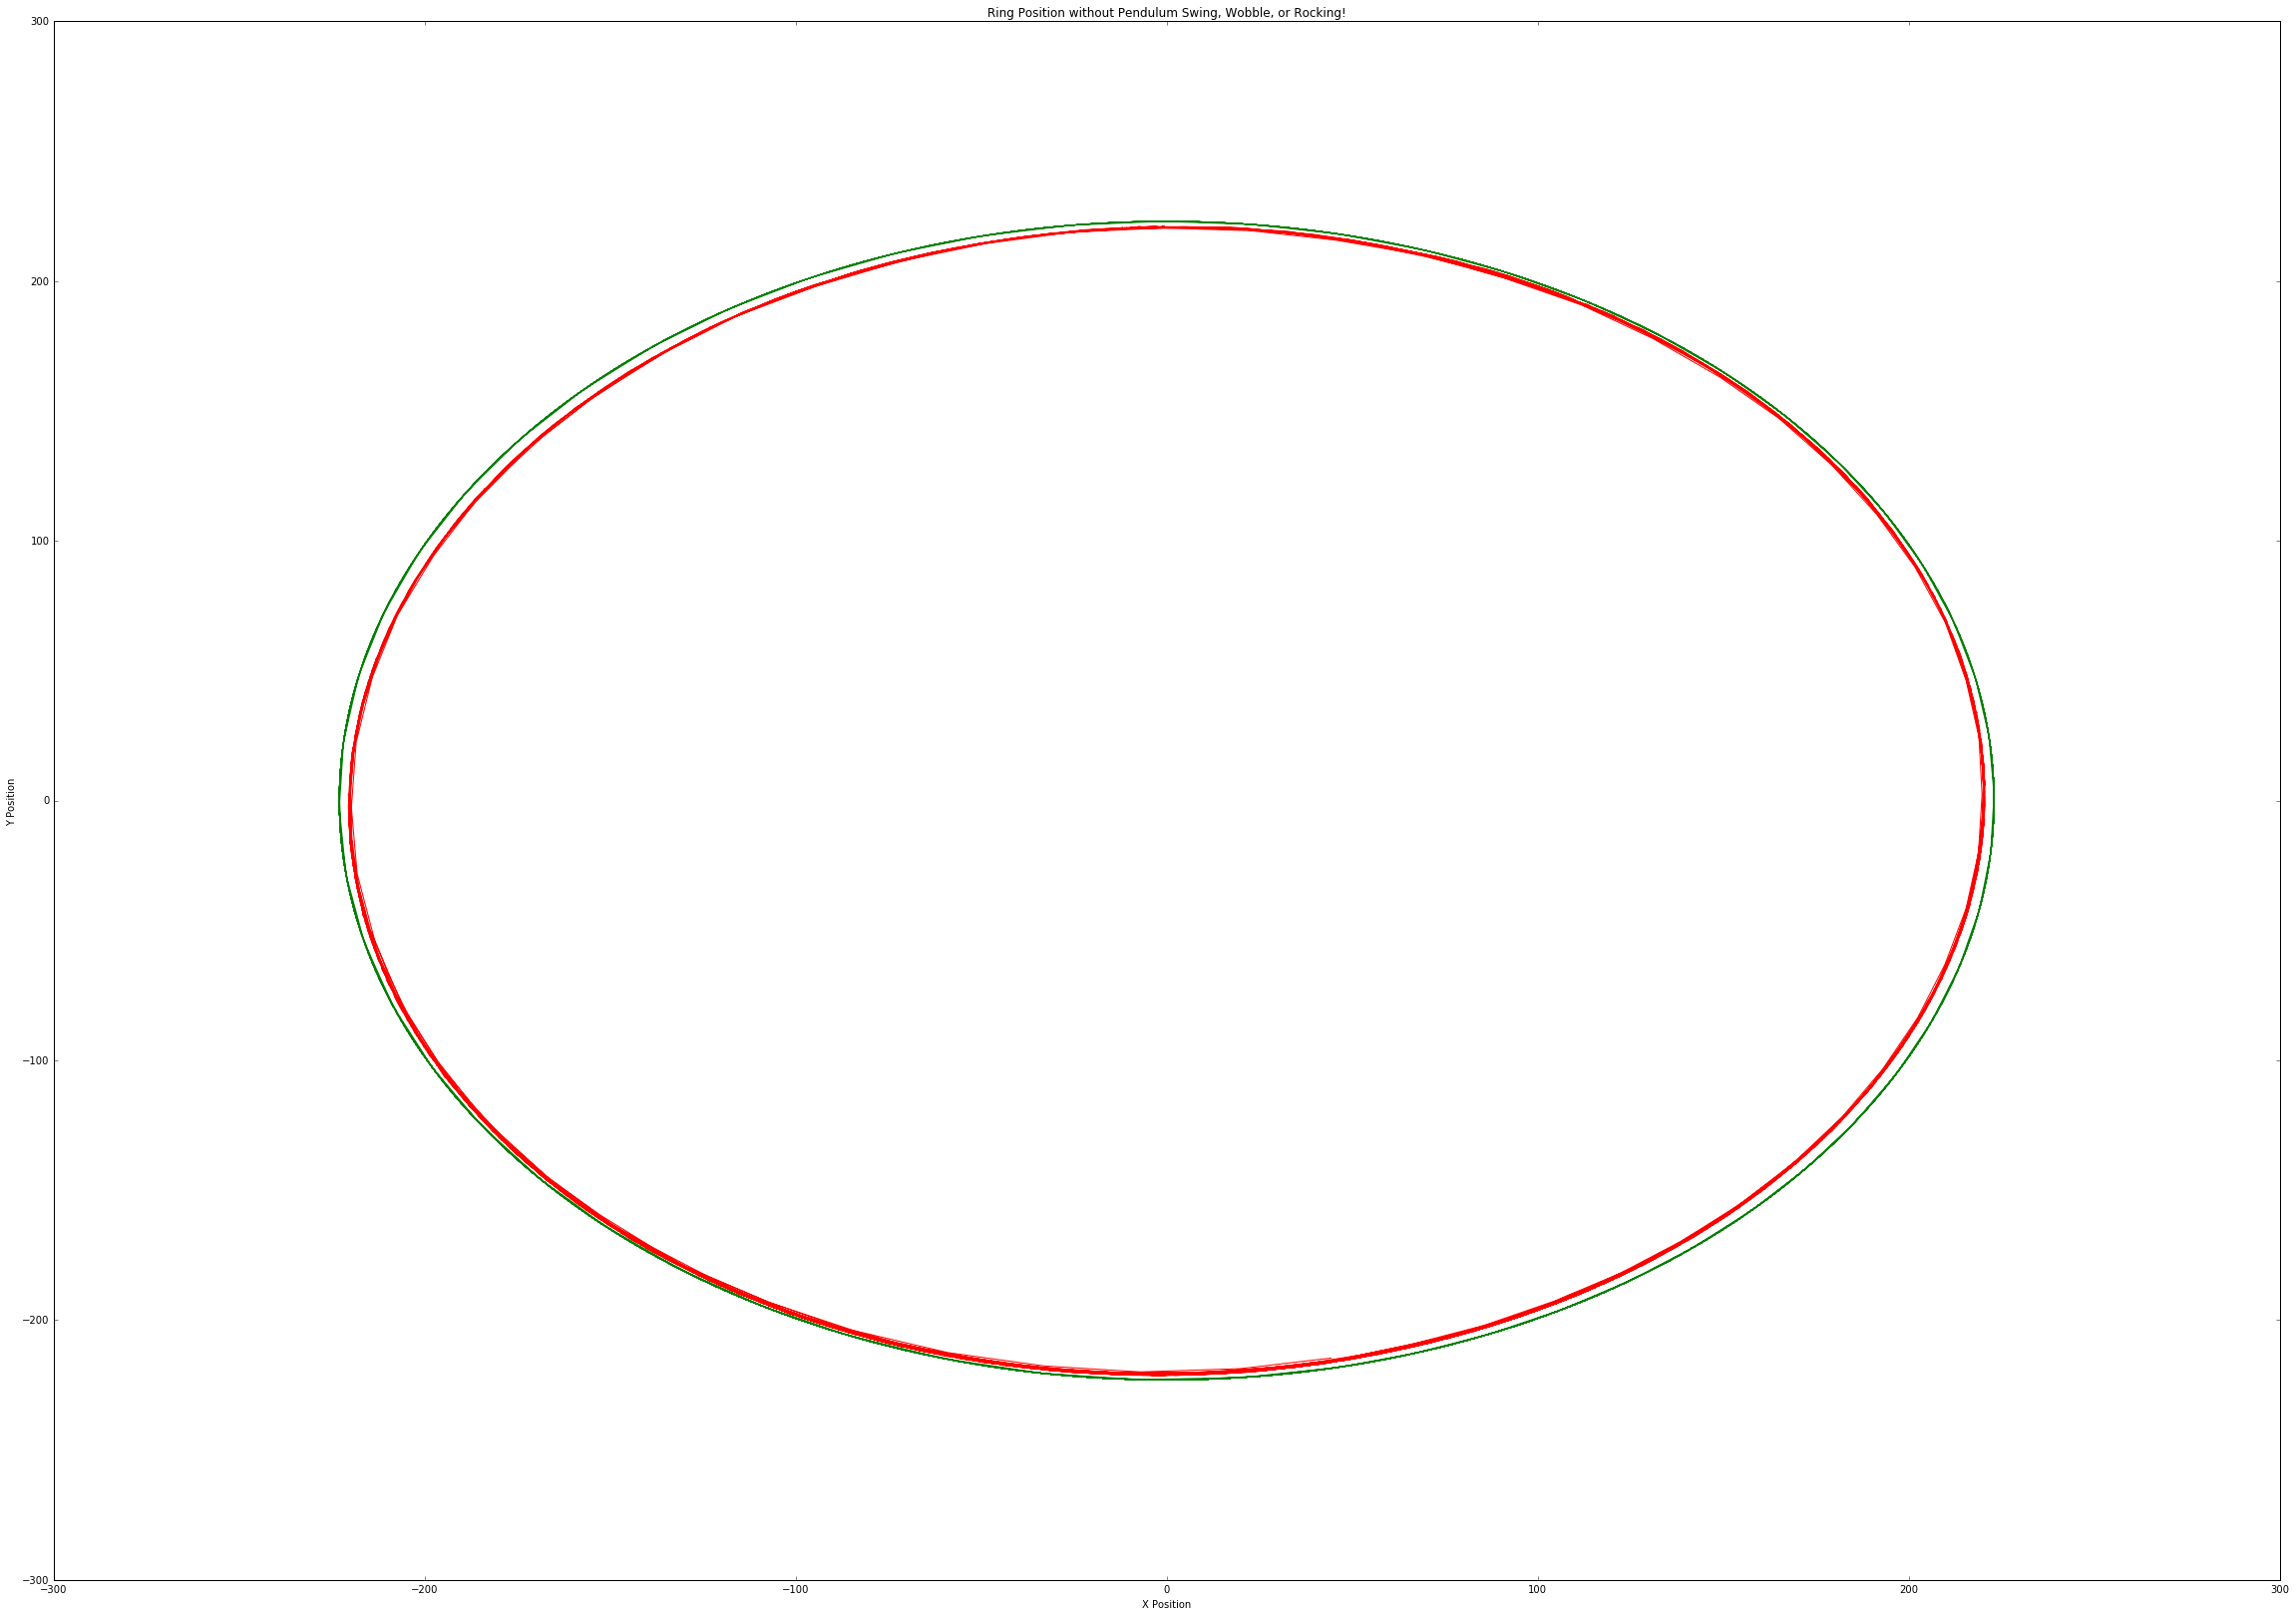

In [39]:
rock_dist = radius - AM
rock_slope = (ArotY - midY_rock)/(ArotX - midX_rock)
rock_x = ((rock_dist**2)/((rock_slope**2)+1))**0.5
rock_y = abs((rock_slope*rock_x))

Ax_sansRock = []
Ay_sansRock = []
Bx_sansRock = []
By_sansRock = []

for i in range(len(ArotX)):
    Ax_sansRock.append(ArotX[i] + (np.sign(ArotX[i]))*rock_x[i])
    Ay_sansRock.append(ArotY[i] + (np.sign(ArotY[i]))*rock_y[i])
    Bx_sansRock.append(BrotX[i] + (np.sign(BrotX[i]))*rock_x[i])
    By_sansRock.append(ArotY[i] + (np.sign(BrotY[i]))*rock_y[i])

#plt.plot(ArotX, ArotY, 'b')
plt.plot(Ax_sansRock,Ay_sansRock,'g')
plt.plot(Ax_sansWob,Ay_sansWob,'r')
plt.title('Ring Position without Pendulum Swing, Wobble, or Rocking!')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()



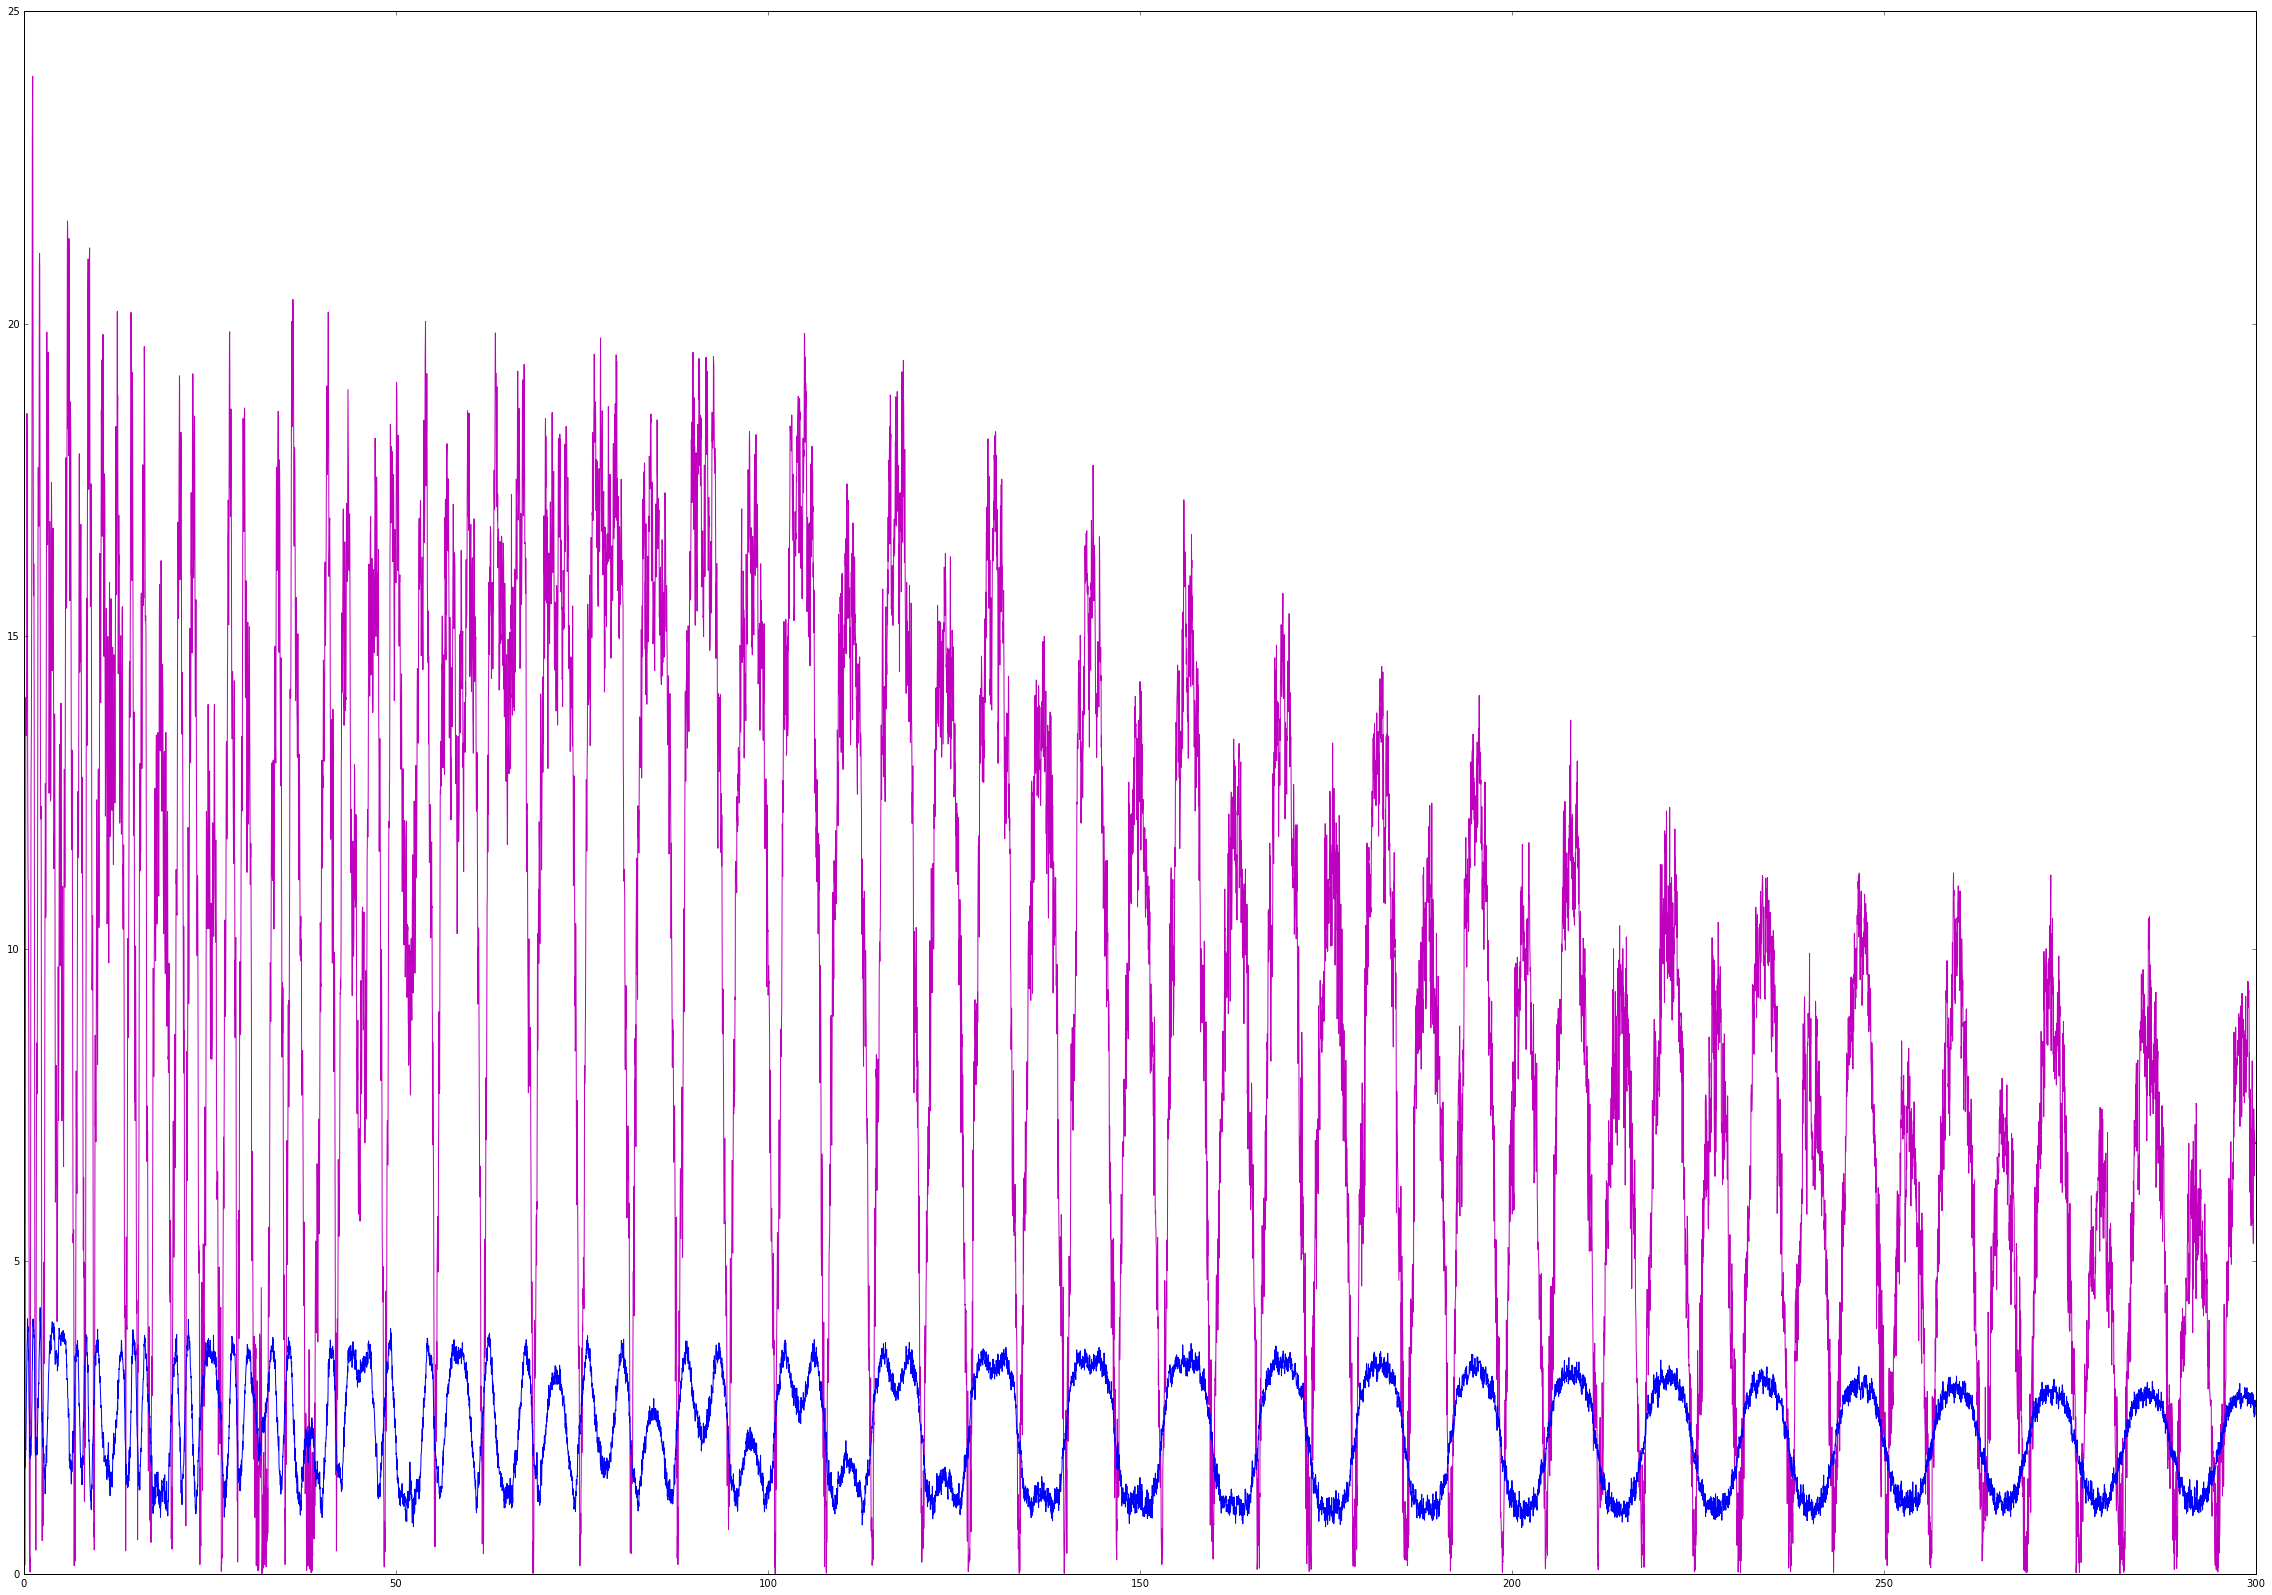

In [40]:
plt.plot(time, wobDis,'m')
plt.plot(time, rock_dist)
plt.show()


In [41]:
print (len(Ax_sansRock))
print(len(Ay_sansRock))
print (len(ArotX))

11997
23994
11997


In [83]:
np.savetxt('WobblyTheta',wob_Th,'m')
np.savetxt('RockTheta',rock_Th)
np.savetxt('Time',time)


ValueError: fmt has wrong number of % formats:  m

In [42]:
np.savetxt('WobblyTheta2',wob_Th)
np.savetxt('RockTheta2',rock_Th)
np.savetxt('Time2',time)

### In this section, Theta and Omega will be calculated and graphed.  3D plotting is introduced. 

To calculate theta, we use the arctan2 function.  Arctan output is between -pi and +pi. Therefore, we need to create a loop that will do a continuous measure of theta when the ring rotates more than one full revolution in one direction.

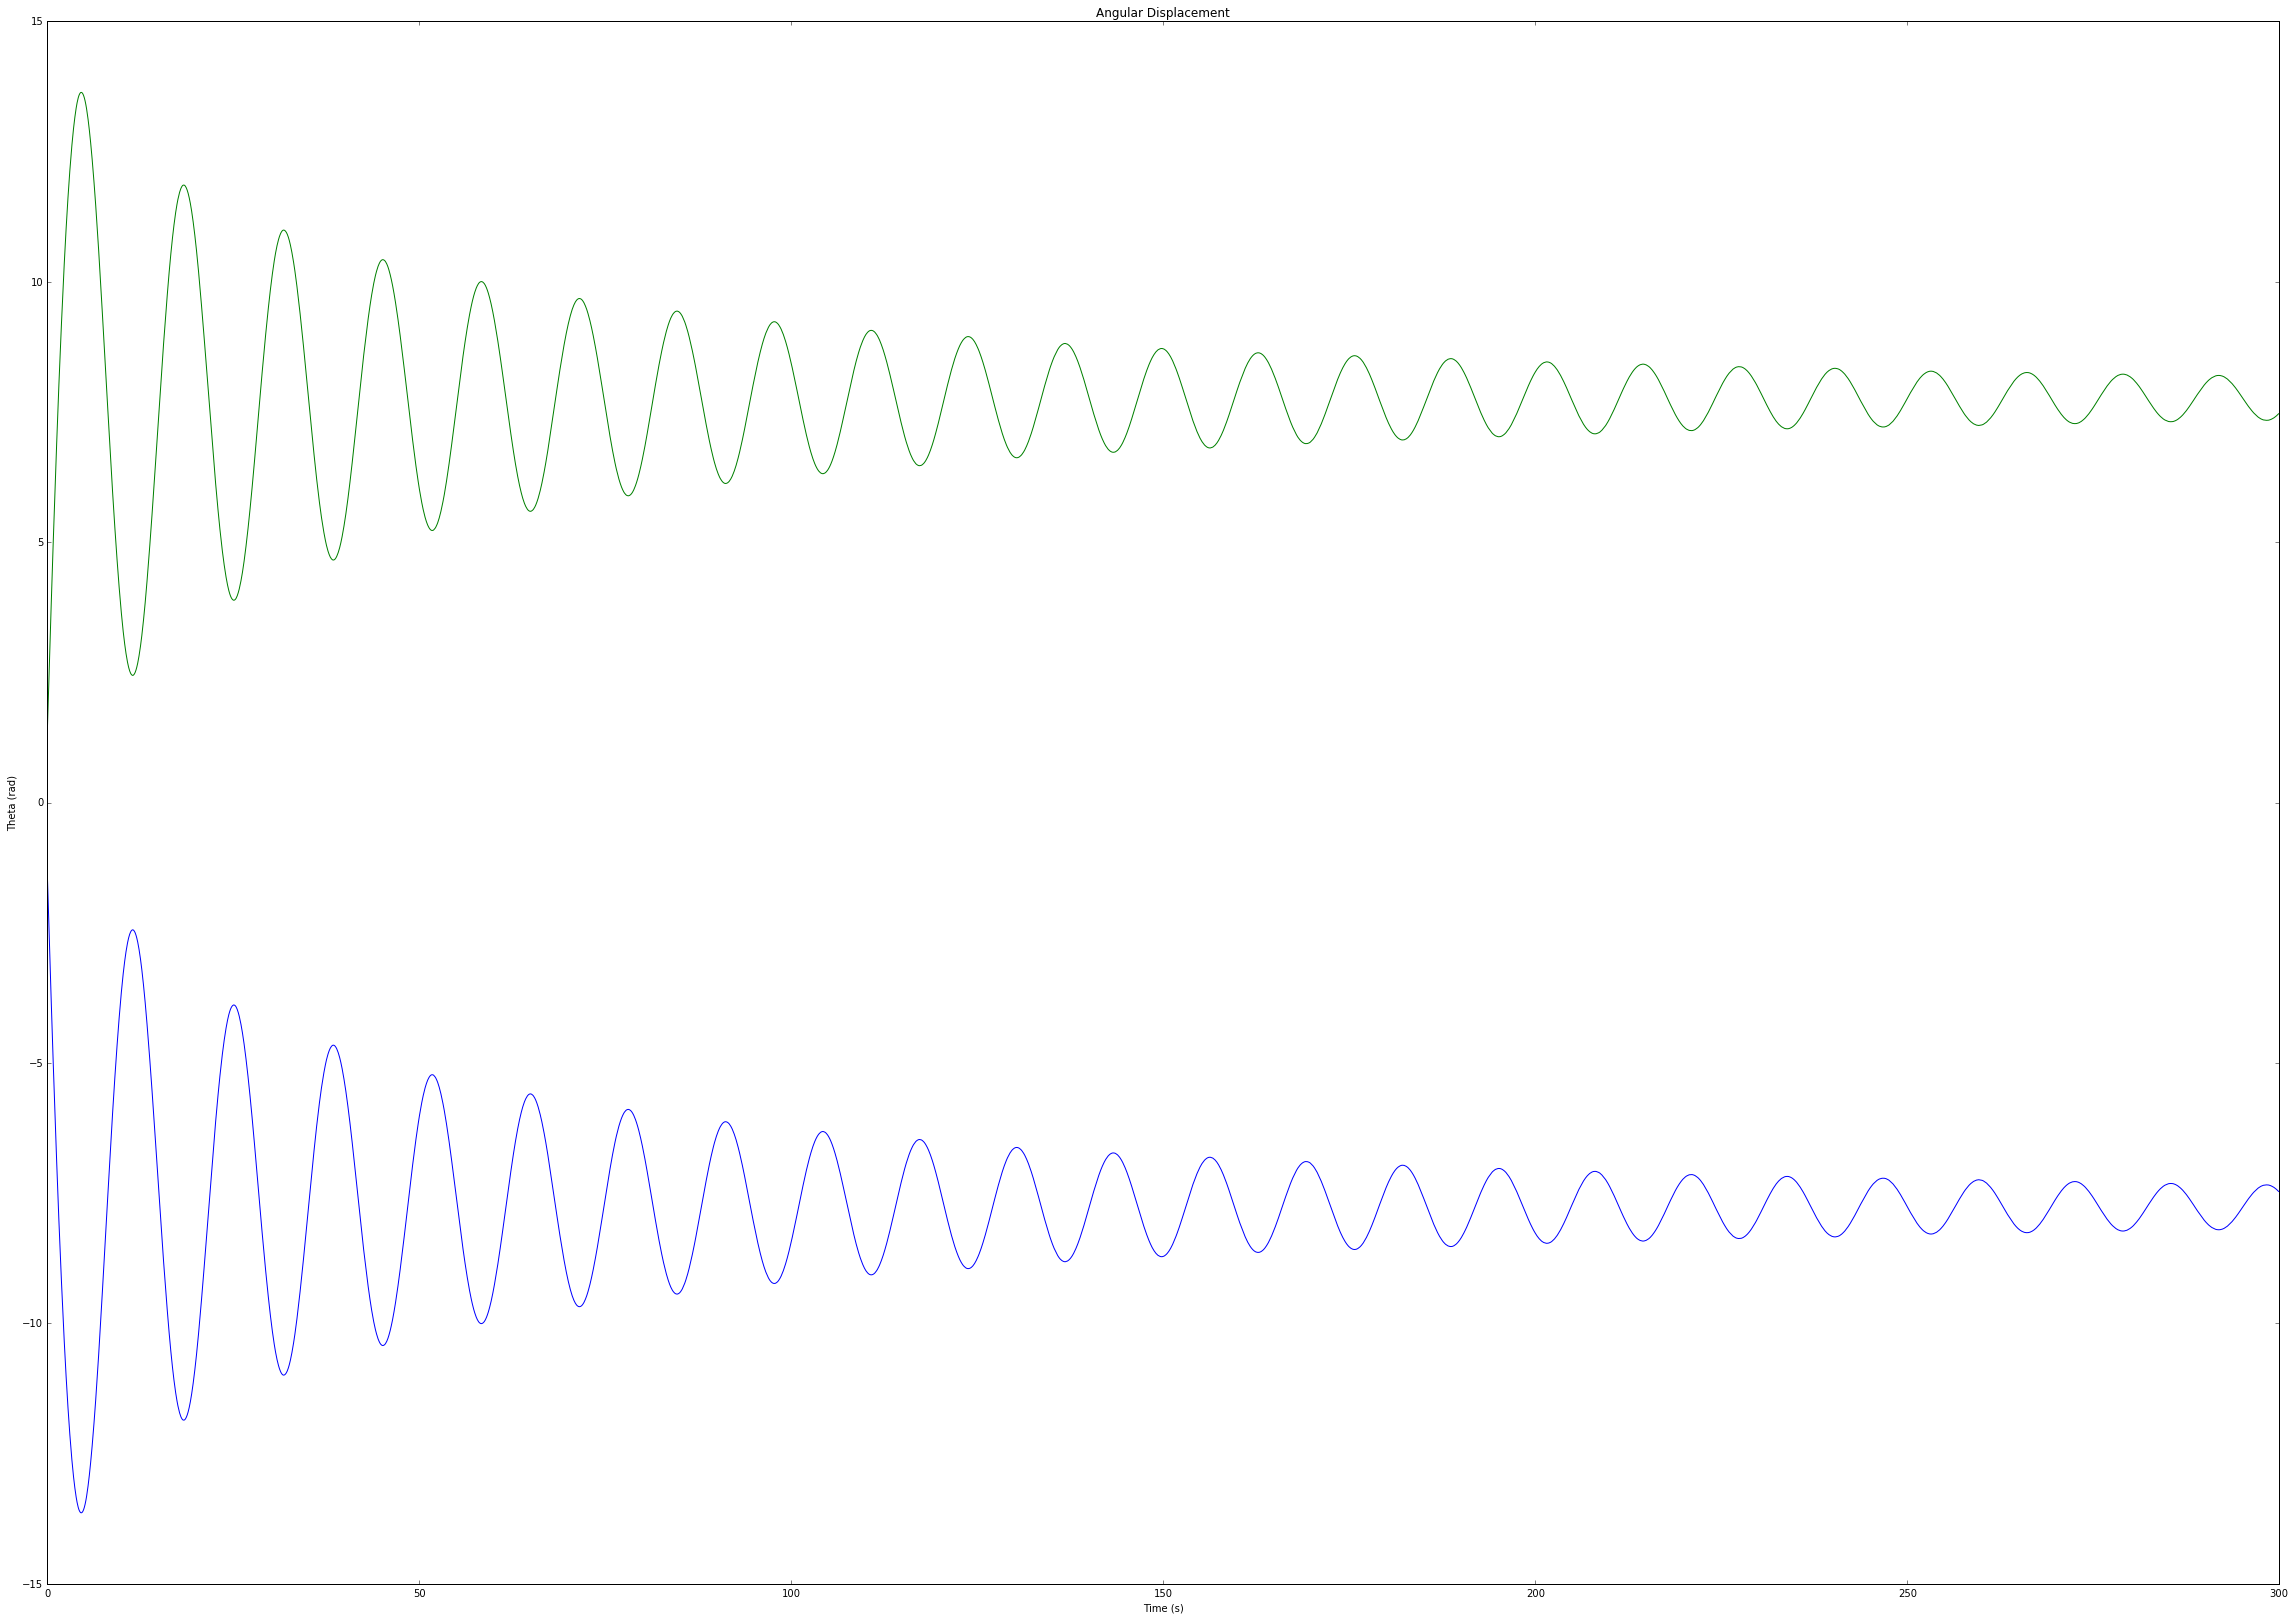

In [41]:
deltaX = (Ax - Bx)
deltaY = (Ay - By)

Ath = (np.arctan2(deltaY, deltaX))
Bth = -1*Ath
    
unwrapAth = []
unwrapBth = []
    
j=0

for i in range(len(Ax)):
    if (Ath[i]-Ath[i-1])>np.pi:
        j-=(2*np.pi)
    elif (Ath[i]-Ath[i-1])<-np.pi:
        j+=(2*np.pi)
    unwrapAth.append(Ath[i]+j)
k=0
for i in range(len(Ax)):
    if (Bth[i]-Bth[i-1])>np.pi:
        k-=(2*np.pi)
    elif (Bth[i]-Bth[i-1])<-np.pi:
        k+=(2*np.pi)
    unwrapBth.append(Bth[i]+k)

    
plt.plot(time, unwrapAth)
plt.plot(time, unwrapBth)
plt.title('Angular Displacement')
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.show()


We use another loop to solve for w. The w arrays will have one less row than the theta arrays.

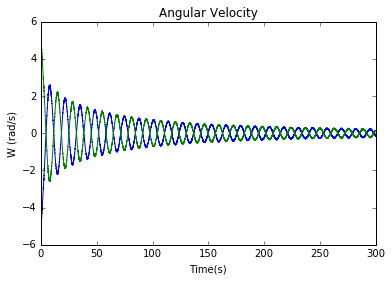

In [23]:
Aw = []
Bw = []
for i in range(len(Ax)-1):
    Aw.append((unwrapAth[i+1]-unwrapAth[i])/(time[i+1]-time[i]))
    Bw.append((unwrapBth[i+1]-unwrapBth[i])/(time[i+1]-time[i]))
    
    
plt.plot(time[0:len(Aw)],Aw)
plt.plot (time[0:len(Aw)],Bw)
plt.title('Angular Velocity')
plt.xlabel('Time(s)')
plt.ylabel('W (rad/s)')
plt.show()

Plot the phase space graph in 2d and in 3d.

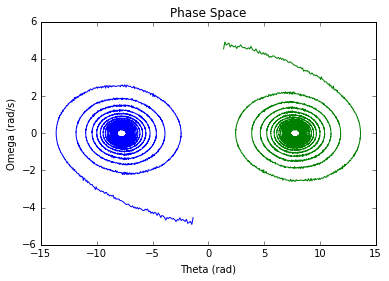

In [26]:
plt.plot(unwrapAth[0:len(Aw)],Aw)
plt.title('Phase Space')
plt.xlabel('Theta (rad)')
plt.plot(unwrapBth[0:len(Aw)],Bw)
plt.ylabel('Omega (rad/s)')
plt.figsize=(12,12)
plt.show()

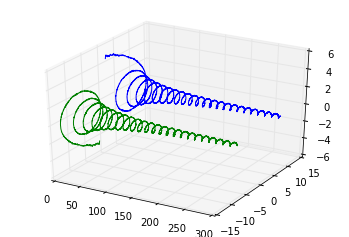

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(time[0:len(Aw)],unwrapAth[0:len(Aw)],Aw,'g')
ax.plot(time[0:len(Aw)],unwrapBth[0:len(Aw)],Bw,'b')
#plt.title('3D Phase Space')
#plt.xlabel('Time (s)')
#plt.ylabel('Theta (rad)')
#plt.zlabel('Omega (rad/s)')
plt.show()

In [81]:
for i in range(len(Ax)):
    
    dist = math.hypot(ArotX[i], ArotY[i])
avg = np.mean(dist)
print (avg)

220.456061131
